<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Combining-all-sample-files" data-toc-modified-id="Combining-all-sample-files-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Combining all sample files</a></span><ul class="toc-item"><li><span><a href="#Writing-file" data-toc-modified-id="Writing-file-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Writing file</a></span></li></ul></li><li><span><a href="#LLMGQC" data-toc-modified-id="LLMGQC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGQC</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Filtered-reads" data-toc-modified-id="Filtered-reads-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Filtered reads</a></span><ul class="toc-item"><li><span><a href="#Perc.-filtered" data-toc-modified-id="Perc.-filtered-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Perc. filtered</a></span></li></ul></li><li><span><a href="#General-QC" data-toc-modified-id="General-QC-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>General QC</a></span><ul class="toc-item"><li><span><a href="#Number-of-reads" data-toc-modified-id="Number-of-reads-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Number of reads</a></span></li></ul></li><li><span><a href="#Coverage" data-toc-modified-id="Coverage-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Coverage</a></span><ul class="toc-item"><li><span><a href="#cov-~-reads" data-toc-modified-id="cov-~-reads-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>cov ~ reads</a></span></li></ul></li></ul></li><li><span><a href="#Writing-tables" data-toc-modified-id="Writing-tables-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Writing tables</a></span><ul class="toc-item"><li><span><a href="#just-'good'-samples" data-toc-modified-id="just-'good'-samples-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>just 'good' samples</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* LLMGQC run on all post-QC sequence sets with the goal of just filtering (using ikraken2) and then checking on post-filter stats

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/'

# sample sheets for each run
run0126_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0126/LLMGQC/final/samples.txt'
run0133_redo_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0133/LLMGQC/Lane3_redo/final/samples.txt'
run0133_repool_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0133/LLMGQC/Lane4_repool/final/samples.txt'
run0138_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0138/LLMGQC/final/samples.txt'

# sample metadata
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'
host_tree_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20190416_rn.nwk'


# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(LeyLabRMisc)

In [4]:
make_dir(work_dir)
df.dims()

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/ 


# Combining all sample files

In [5]:
df = read.delim(run0126_file, sep='\t') %>%
    mutate(Run = 126, Lane = 2)

x = read.delim(run0133_redo_file, sep='\t') %>%
    mutate(Run = 133, Lane = 3)
df = rbind(df, x)

x = read.delim(run0133_repool_file, sep='\t') %>%
    mutate(Run = 133, Lane = 4)
df = rbind(df, x)

x = read.delim(run0138_file, sep='\t') %>%
    mutate(Run = 138, Lane = 8)
df = rbind(df, x)

df 

Sample,Read1,Read2,Notes,Run,Lane
<fct>,<fct>,<fct>,<lgl>,<dbl>,<dbl>
X101_Horse,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0126/LLMGQC/final/X101_Horse/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0126/LLMGQC/final/X101_Horse/R2_final.fq.gz,NA,126,2
X107_House_Mouse,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0126/LLMGQC/final/X107_House_Mouse/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0126/LLMGQC/final/X107_House_Mouse/R2_final.fq.gz,NA,126,2
⋮,⋮,⋮,⋮,⋮,⋮
XF42_Fallow_Deer,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0138/LLMGQC/final/XF42_Fallow_Deer/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0138/LLMGQC/final/XF42_Fallow_Deer/R2_final.fq.gz,NA,138,8
XF44_Fallow_Deer,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0138/LLMGQC/final/XF44_Fallow_Deer/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRun0138/LLMGQC/final/XF44_Fallow_Deer/R2_final.fq.gz,NA,138,8


Number of rows: 324 
File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/ce5065f7514fc714c288d0e4e00ddd5c.RDS 


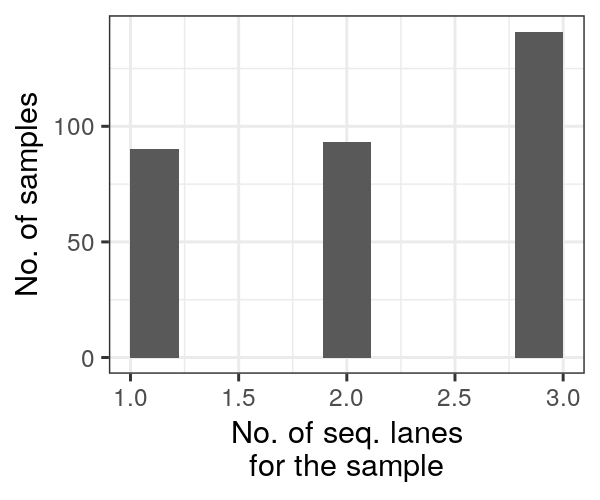

In [9]:
# summary
df_s = df %>%
    group_by(Sample) %>%
    summarize(n = n()) %>%
    ungroup()

df_s %>% nrow %>% cat('Number of rows:', ., '\n')

p = df_s %>%
    ggplot(aes(n)) +
    geom_histogram(bins=10) +
    labs(x='No. of seq. lanes\nfor the sample', y='No. of samples') +
    theme_bw()

p.dims(3, 2.5)
Plot(p)

## Writing file

In [9]:
outF = file.path(work_dir, 'samples.txt')
write.table(df %>% dplyr::select(-Notes), outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//samples.txt 


# LLMGQC

In [4]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- Software parameters --#
# Use "Skip" to skip any of these steps. If no params for rule, use ""
# `clumpify`: change dupedist if not HiSeq3000/4000 (dupedist=40 for NextSeq, HiSeq2500, and MiSeq)
params:
  # read download
  remote: just_single=False      # If True, just download read1 (if remote file)
  # validation, conversion, subsampling
  validate_reads: Skip #""
  convert_fastq_to_1.8: Skip #""
  seqtk_sample: Skip    # Use number to subsample reads (eg., 1000000)
  fastqc_on_raw: ""
  # de-duplication
  clumpify: Skip #dedupe=t dupedist=2500 optical=t    # this will l

In [11]:
pipelineInfo('/ebio/abt3_projects/Georg_animal_feces/bin/llmgqc/')

LLMGQC

Ley Lab Metagenome Quality Control (LLMGQC)

* Version: 0.8.4
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgqc//bin/envs/centrifuge.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::centrifuge

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgqc//bin/envs/fastqc.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- bioconda::fastqc=0.11.7

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgqc//bin/envs/fqtools.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- python=3
- bioconda::seqtk
- bioconda::biopython=1.70
- bioconda::fqtools=2.0
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgqc//bin/envs/krona.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::krona
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgqc//bin/envs/multiqc.yaml <==
channels:
- conda-forge
- biocon

# Summary

In [10]:
metadata = read.delim(metadata_file, sep='\t')  %>%
    dplyr::select(SampleID, scientific_name, class, order, family, genus,
                  habitat, diet, sample_type) %>%
    mutate(SampleID = gsub('^F', 'XF', SampleID))
metadata

SampleID,scientific_name,class,order,family,genus,habitat,diet,sample_type
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
XF14_Common_Bream,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,aquatic habitat,omnivore,feces
XF35_Red_Deer,Cervus_elaphus,Mammalia,Artiodactyla,Cervidae,Cervus,terrestrial habitat,herbivore,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,Oncorhynchus_mykiss,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,aquatic habitat,carnivore,feces
X232_fail_Brown_Trout,Salmo_trutta,Actinopterygii,Salmoniformes,Salmonidae,Salmo,aquatic habitat,carnivore,gut


## Filtered reads 

* summary of reads filtered

In [11]:
P = file.path(work_dir, 'filter')
rpt_files = list.files(P, 'kraken2_ifilter_report.tsv', full.names = TRUE, recursive = TRUE)
rpt_files %>% length %>% cat('Number of files:', ., '\n')
rpt_files %>% head(n=3)

Number of files: 699 


[1] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//filter/unassigned/126/2/kraken2_ifilter_report.tsv"        
[2] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//filter/unassigned/138/8/kraken2_ifilter_report.tsv"        
[3] "/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//filter/X1_Eurasian_Beaver/126/2/kraken2_ifilter_report.tsv"

In [12]:
filt = list()
for(F in rpt_files){
    x = strsplit(F, '/')[[1]]
    y = read.delim(F, sep='\t') 
    y$Sample = x[length(x)-3]
    y$Run = x[length(x)-2]
    y$Lane = x[length(x)-1]
    filt[[F]] = y
}

filt = do.call(rbind, filt)
rownames(filt) = 1:nrow(filt)
filt = filt 
filt 

,filter_iteration,database,total_reads,classified_reads,unclassified_reads,Sample,Run,Lane
,<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_genome_db/,32244739,1522235,30722504,unassigned,126,2
2,2,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_nt_db/,30722504,100221,30622283,unassigned,126,2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4193,5,/ebio/abt3_projects/databases_no-backup/kraken2/fungi_db/,999450,1,999449,XF90_Domestic_Dog,126,2
4194,6,/ebio/abt3_projects/databases_no-backup/kraken2/protozoa_db/,999449,0,999449,XF90_Domestic_Dog,126,2


In [13]:
# joining
setdiff(filt$Sample, metadata$SampleID) %>% print

# joining
filt = filt %>%
    left_join(metadata, c('Sample'='SampleID'))

filt 

[1] "unassigned"


filter_iteration,database,total_reads,classified_reads,unclassified_reads,Sample,Run,Lane,scientific_name,class,order,family,genus,habitat,diet,sample_type
<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_genome_db/,32244739,1522235,30722504,unassigned,126,2,NA,NA,NA,NA,NA,NA,NA,NA
2,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_nt_db/,30722504,100221,30622283,unassigned,126,2,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,/ebio/abt3_projects/databases_no-backup/kraken2/fungi_db/,999450,1,999449,XF90_Domestic_Dog,126,2,Canis_lupus,Mammalia,Carnivora,Canidae,Canis,terrestrial habitat,carnivore,feces
6,/ebio/abt3_projects/databases_no-backup/kraken2/protozoa_db/,999449,0,999449,XF90_Domestic_Dog,126,2,Canis_lupus,Mammalia,Carnivora,Canidae,Canis,terrestrial habitat,carnivore,feces


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
classified reads,0,1,23,26905.75,413.75,11783713,4808460,1963046


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/54fe8ffcd2d2992836c337f81e37e923.RDS 


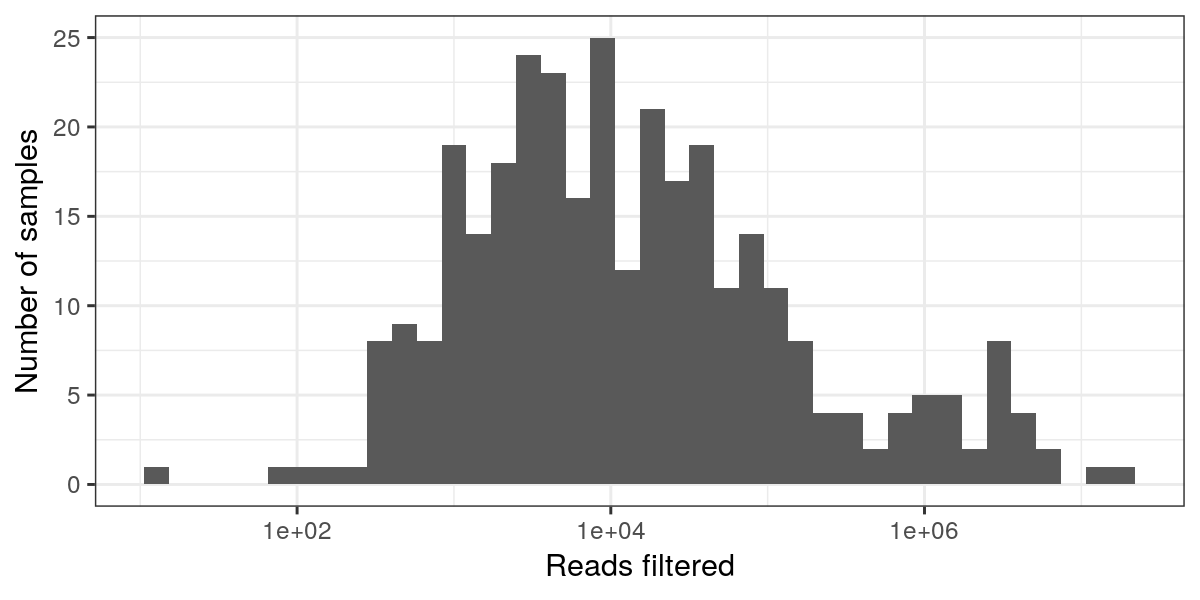

In [16]:
# total filtered
filt %>%
    .$classified_reads %>% 
    summary_x('classified reads')

p = filt %>%
    group_by(Sample) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(classified_reads)) +
    geom_histogram(bins=40) +
    scale_x_log10() +
    labs(x='Reads filtered', y='Number of samples') +
    theme_bw()

p.dims(6,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/c2579f1e14b801bbfe94d80b84ff5171.RDS 


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 242 rows containing non-finite values (stat_boxplot).”


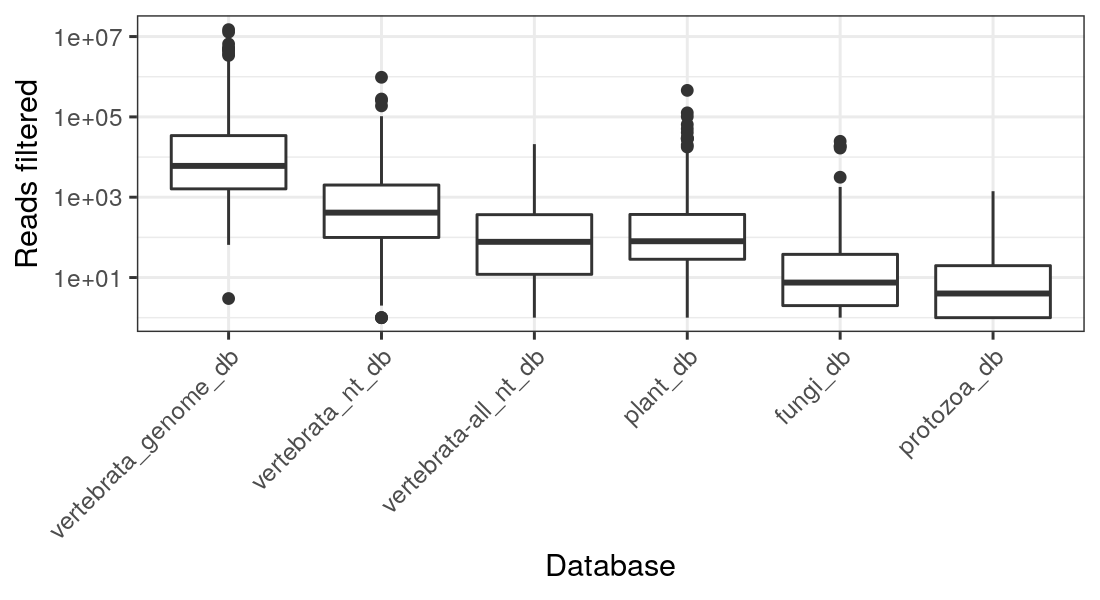

In [18]:
# total filtered
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order)) %>%
    group_by(Sample, database) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(database, classified_reads)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(y='Reads filtered', x='Database') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/bf39f9f0488a31365d5edf9d9039c8da.RDS 


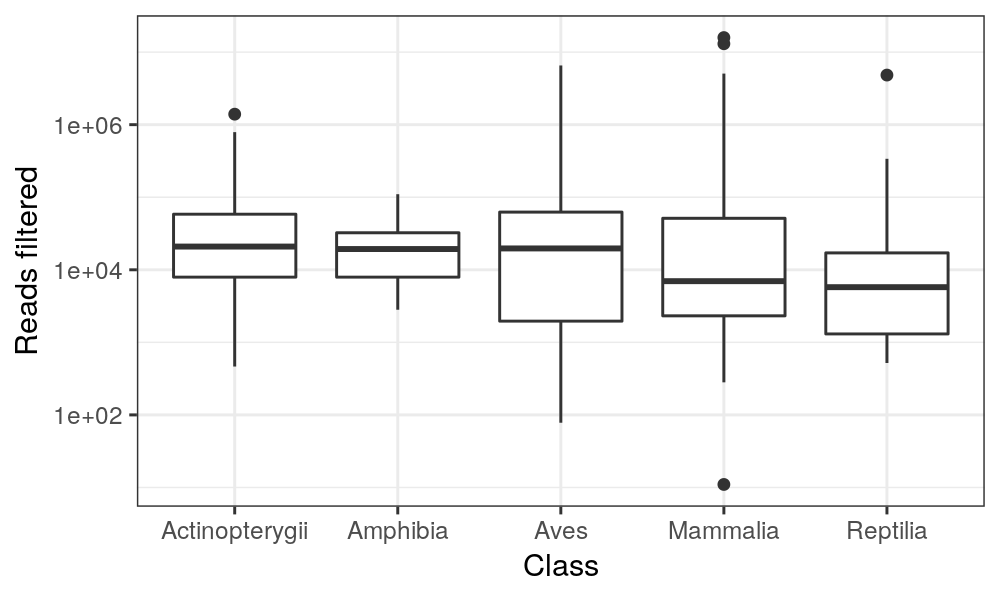

In [22]:
# total filtered
p = filt %>%
    filter(!is.na(class)) %>%
    group_by(Sample, class) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(class, classified_reads)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(y='Reads filtered', x='Class') +
    theme_bw()

p.dims(5,3)
Plot(p)

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/a7b762c91bfee7cc28ec8e63e720e550.RDS 


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 242 rows containing non-finite values (stat_boxplot).”


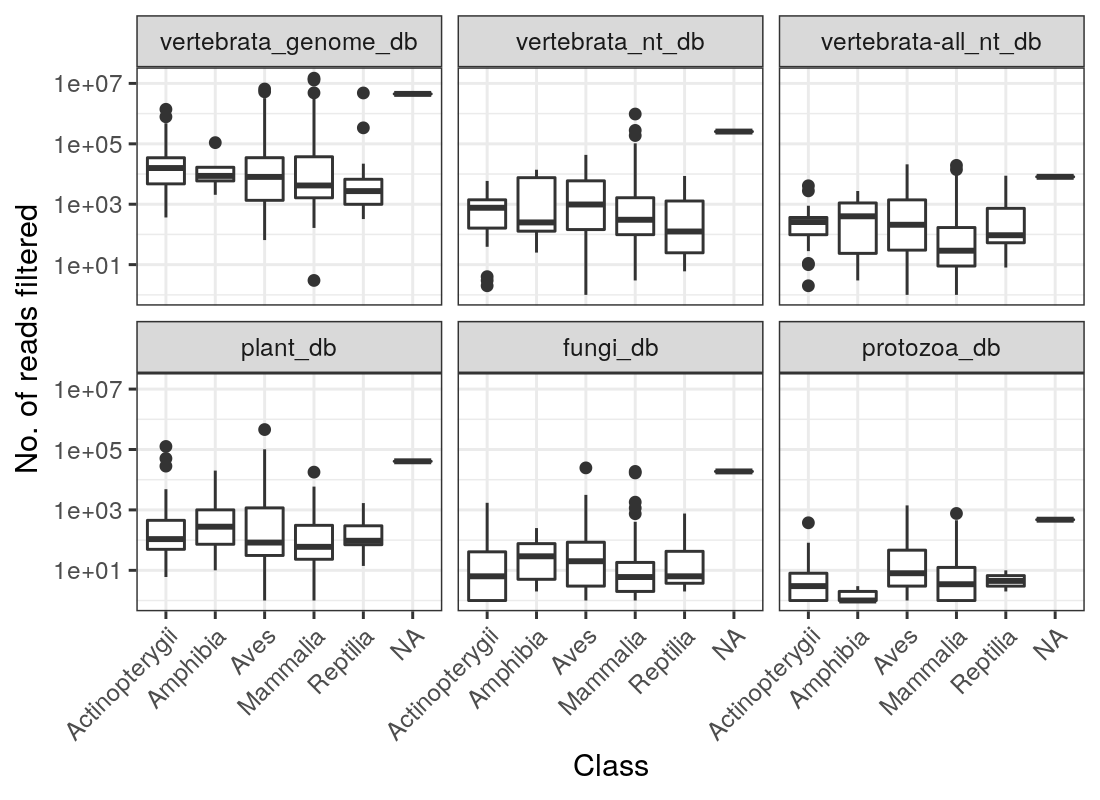

In [24]:
# total filtered
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order)) %>%
    group_by(Sample, class, database) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(class, classified_reads)) +
    geom_boxplot() +
    scale_y_log10() +
    facet_wrap(~ database) +
    labs(y='No. of reads filtered', x='Class') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,4)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/78c364816f9e79fe2d21af900217d294.RDS 


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 242 rows containing non-finite values (stat_boxplot).”


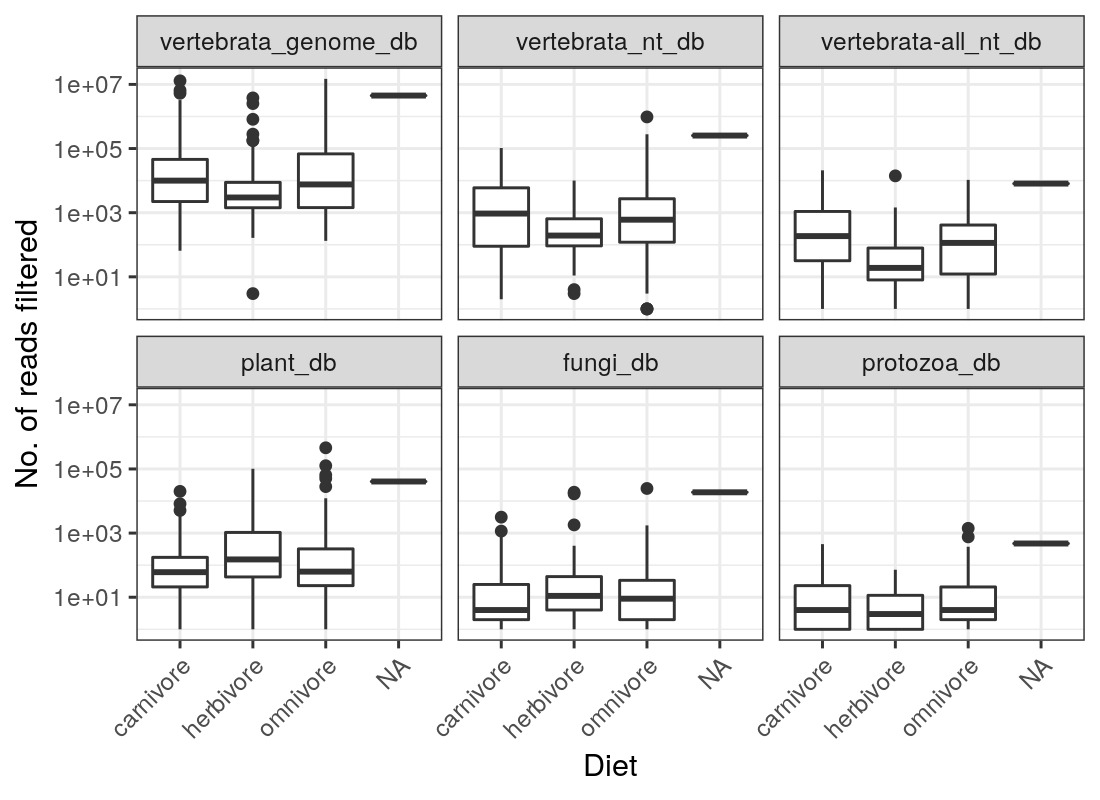

In [26]:
# total filtered
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order),
           diet = gsub(' ', '', diet)) %>%
    group_by(Sample, diet, database) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(diet, classified_reads)) +
    geom_boxplot() +
    scale_y_log10() +
    facet_wrap(~ database) +
    labs(y='No. of reads filtered', x='Diet') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,4)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/8d7dfeb4e65e9c3097dda05905c021a5.RDS 


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 242 rows containing non-finite values (stat_boxplot).”


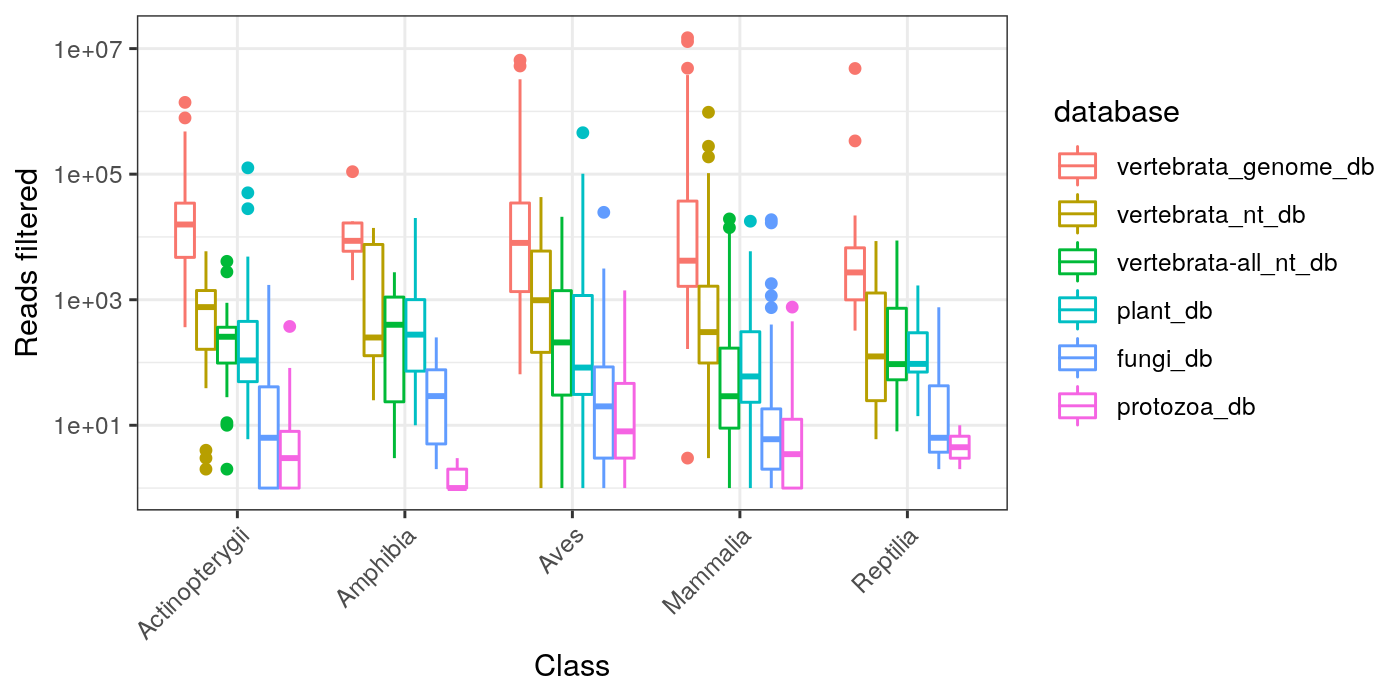

In [30]:
# filtered by db
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt %>%
    filter(!is.na(class)) %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order)) %>%
    group_by(Sample, class, database) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    ggplot(aes(class, classified_reads, color=database)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(y='Reads filtered', x='Class') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7,3.5)
Plot(p)

In [31]:
# top filtered
df.dims(20)
filt %>%
    group_by(Sample, class, order, diet) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    arrange(-classified_reads) %>%
    head(n=20)
df.dims()

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `order` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `diet` contains implicit NA, consider using `forcats::fct_explicit_na`”


Sample,class,order,diet,classified_reads
<chr>,<fct>,<fct>,<fct>,<int>
X392_House_Mouse,Mammalia,Rodentia,omnivore,15867951
X331_Harbor_Porpoise,Mammalia,Cetacea,carnivore,13044367
X159_White_tailed_Eagle,Aves,Falconiformes,carnivore,6547793
X158_White_tailed_Eagle,Aves,Falconiformes,carnivore,5326370
X10_House_Mouse,Mammalia,Rodentia,omnivore,5059958
X292_Central_Bearded_Dragon,Reptilia,Squamata,omnivore,4826636
unassigned,NA,NA,NA,4808450
X66_Mouflon,Mammalia,Artiodactyla,herbivore,3795196
X16_Fat_Dormouse,Mammalia,Rodentia,omnivore,3398343


In [32]:
# bottom filtered
df.dims(20)
filt %>%
    group_by(Sample, class, order, diet) %>%
    summarize(classified_reads = sum(classified_reads)) %>%
    ungroup() %>%
    arrange(classified_reads) %>%
    head(n=20)
df.dims()

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `order` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `diet` contains implicit NA, consider using `forcats::fct_explicit_na`”


Sample,class,order,diet,classified_reads
<chr>,<fct>,<fct>,<fct>,<int>
X93_Red_Sheep,Mammalia,Artiodactyla,herbivore,11
X297_Horsfields_Bronze_Cuckoo,Aves,Cuculiformes,carnivore,78
X294_Emu,Aves,Struthioniformes,omnivore,135
X295_Emu,Aves,Struthioniformes,omnivore,175
X298_Horsfields_Bronze_Cuckoo,Aves,Cuculiformes,carnivore,249
X247_Common_Hamster,Mammalia,Rodentia,omnivore,281
X38_Great_Tit,Aves,Passeriformes,omnivore,338
X55_fail1_Water_Pipit,Aves,Passeriformes,carnivore,342
X362_Gray_Four_eyed_Opossum,Mammalia,Didelphimorphia,omnivore,344


### Perc. filtered

In [33]:
filt_totals = filt %>% 
    filter(database == '/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_genome_db/') %>%
    group_by(Sample) %>%
    summarize(total_reads = sum(total_reads)) %>%
    ungroup() %>%
    rename('starting_reads' = total_reads)

filt_totals

Sample,starting_reads
<chr>,<int>
unassigned,74311772
X1_Eurasian_Beaver,1619298
⋮,⋮
XF44_Fallow_Deer,2901007
XF90_Domestic_Dog,1007988


In [34]:
filt_j = filt %>%
    inner_join(filt_totals, c('Sample'))

filt_j 

filter_iteration,database,total_reads,classified_reads,unclassified_reads,Sample,Run,Lane,scientific_name,class,order,family,genus,habitat,diet,sample_type,starting_reads
<int>,<fct>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_genome_db/,32244739,1522235,30722504,unassigned,126,2,NA,NA,NA,NA,NA,NA,NA,NA,74311772
2,/ebio/abt3_projects/databases_no-backup/kraken2/vertebrata_nt_db/,30722504,100221,30622283,unassigned,126,2,NA,NA,NA,NA,NA,NA,NA,NA,74311772
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,/ebio/abt3_projects/databases_no-backup/kraken2/fungi_db/,999450,1,999449,XF90_Domestic_Dog,126,2,Canis_lupus,Mammalia,Carnivora,Canidae,Canis,terrestrial habitat,carnivore,feces,1007988
6,/ebio/abt3_projects/databases_no-backup/kraken2/protozoa_db/,999449,0,999449,XF90_Domestic_Dog,126,2,Canis_lupus,Mammalia,Carnivora,Canidae,Canis,terrestrial habitat,carnivore,feces,1007988


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
classified reads,0.008254597,0.1259086,0.5874267,6.319956,2.488708,73.70693,29.409,12.006


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/8a4ed1ce66021608b54b374daee5b12e.RDS 


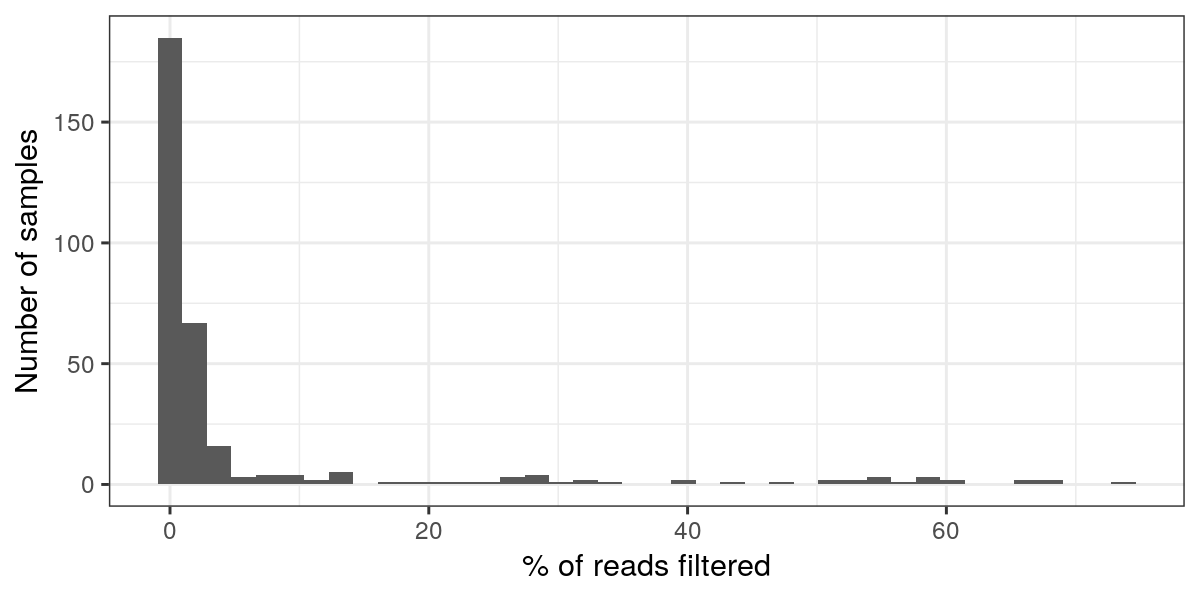

In [37]:
# total filtered
filt_j %>%
    group_by(Sample) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    .$classified_reads %>%
    summary_x('classified reads')

p = filt_j %>%
    group_by(Sample) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    ggplot(aes(classified_reads)) +
    geom_histogram(bins=40) +
    labs(x='% of reads filtered', y='Number of samples') +
    theme_bw()

p.dims(6,3)
Plot(p)

Warning message:
“Factor `sample_type` contains implicit NA, consider using `forcats::fct_explicit_na`”


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/f5629b53f5b929b628c4d0ea261d9ede.RDS 


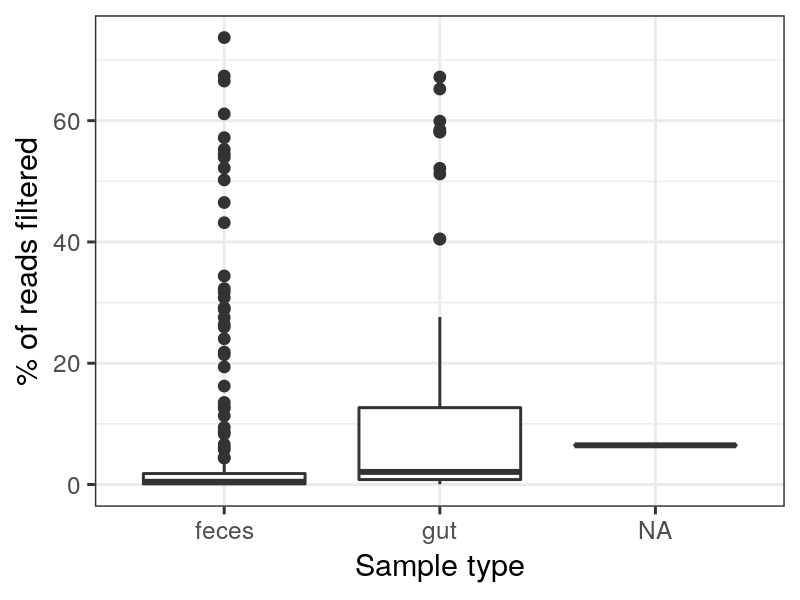

In [38]:
p = filt_j %>%
    group_by(Sample, sample_type) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    ggplot(aes(sample_type, classified_reads)) +
    geom_boxplot() +
    labs(y='% of reads filtered', x='Sample type') +
    theme_bw()

p.dims(4,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/f5629b53f5b929b628c4d0ea261d9ede.RDS 


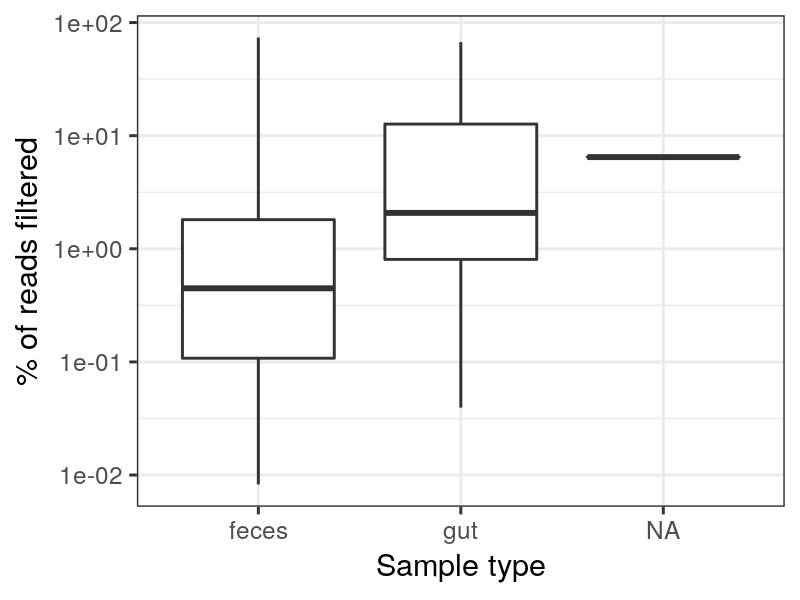

In [39]:
p.dims(4,3)
Plot(p + scale_y_log10())

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/24640c557519d1a8d80d5ea17d88136e.RDS 


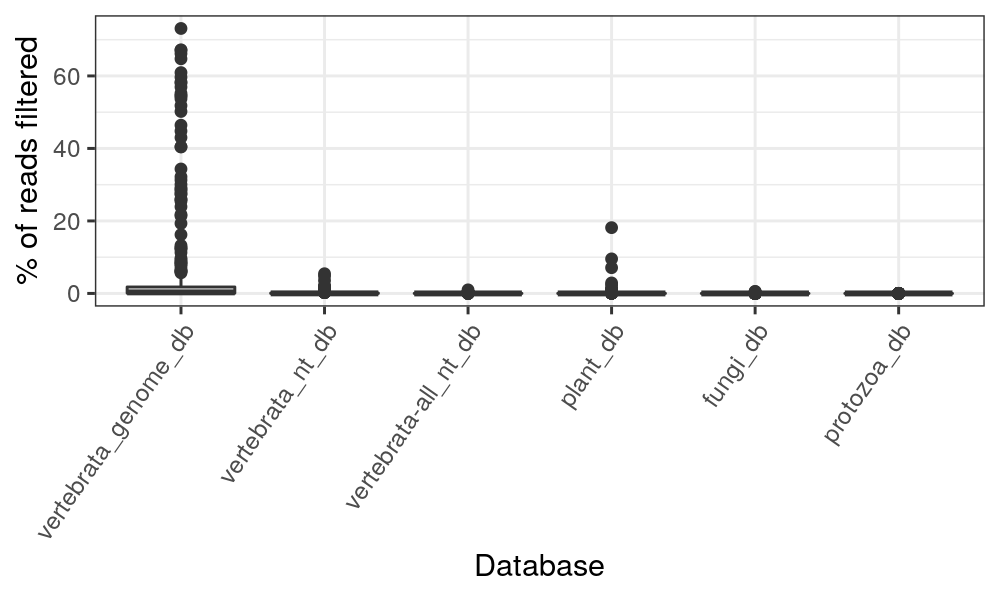

In [43]:
# total filtered
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt_j %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order)) %>%
    group_by(Sample, database) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    ggplot(aes(database, classified_reads)) +
    geom_boxplot() +
    labs(y='% of reads filtered', x='Database') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(5,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/aa5210680a464b735d49a70b0933406b.RDS 


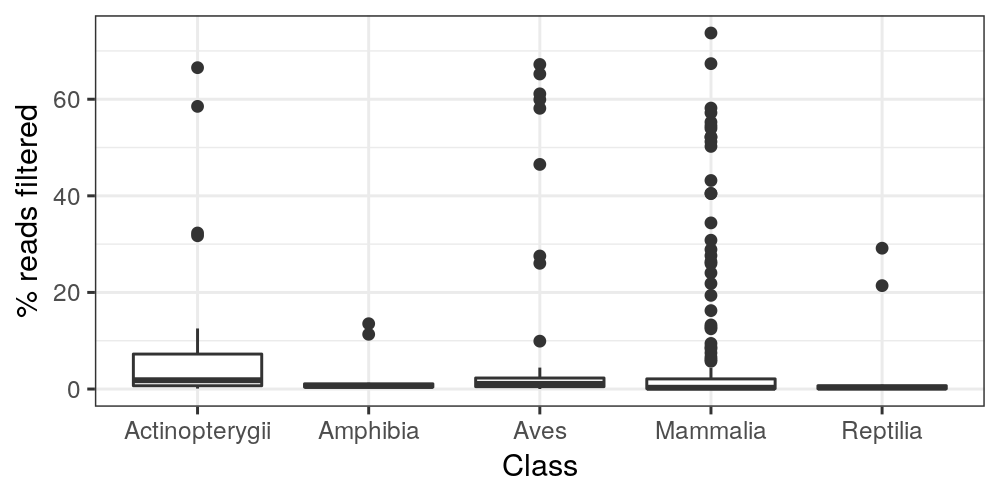

In [47]:
# total filtered
p = filt_j %>%
    filter(!is.na(class)) %>%
    group_by(Sample, class) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    ggplot(aes(class, classified_reads)) +
    geom_boxplot() +
    labs(y='% reads filtered', x='Class') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/c9268637a3426b57a405cf03820cb7f4.RDS 


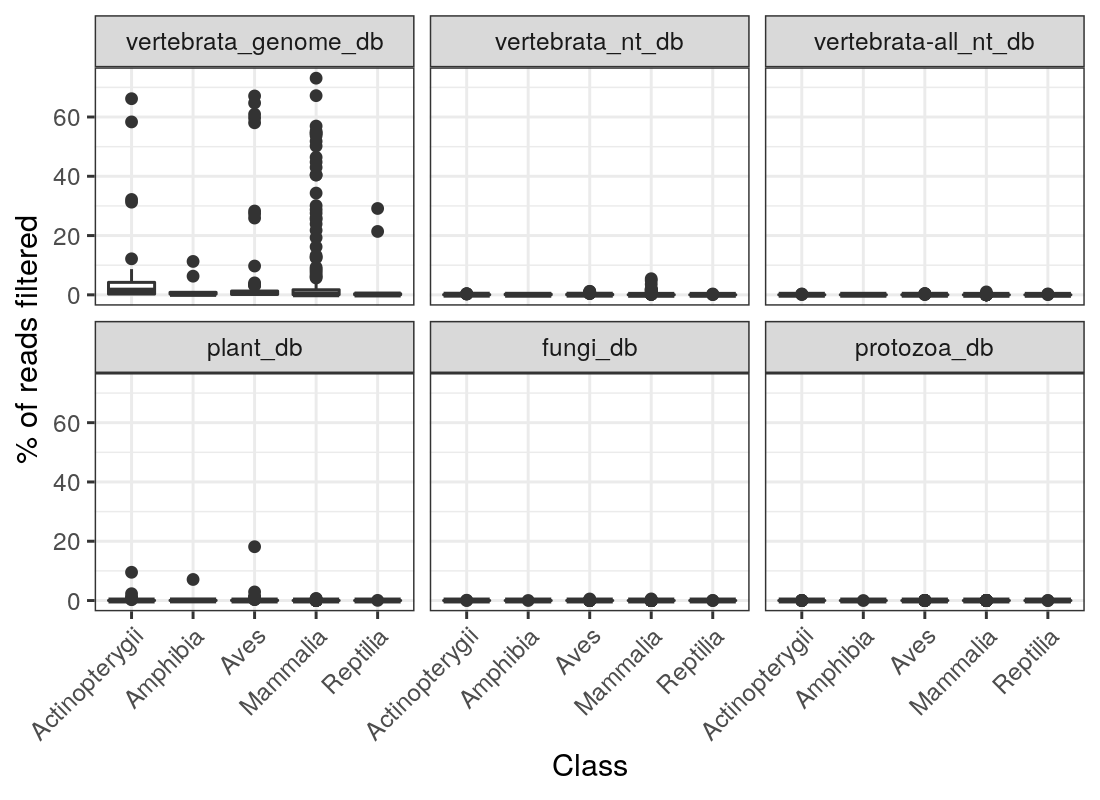

In [50]:
# total filtered
db_order = c('vertebrata_genome_db', 'vertebrata_nt_db', 'vertebrata-all_nt_db', 
             'plant_db', 'fungi_db', 'protozoa_db')
p = filt_j %>%
    filter(!is.na(class)) %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database),
           database = factor(database, levels=db_order)) %>%
    group_by(Sample, class, database) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    ggplot(aes(class, classified_reads)) +
    geom_boxplot() +
    facet_wrap(~ database) +
    labs(y='% of reads filtered', x='Class') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(5.5,4)
Plot(p)

In [51]:
# top filtered
df.dims(30)
filt_j %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database)) %>%
    group_by(Sample, class, diet, sample_type, database) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    filter(database == 'vertebrata_genome_db') %>%
    arrange(-classified_reads) %>%
    head(n=30)
df.dims()

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `diet` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `sample_type` contains implicit NA, consider using `forcats::fct_explicit_na`”


Sample,class,diet,sample_type,database,classified_reads
<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>
X331_Harbor_Porpoise,Mammalia,carnivore,feces,vertebrata_genome_db,73.09690
X336_Sei_Whale,Mammalia,carnivore,feces,vertebrata_genome_db,67.20076
X159_White_tailed_Eagle,Aves,carnivore,gut,vertebrata_genome_db,67.09740
X330_Ide,Actinopterygii,carnivore,feces,vertebrata_genome_db,66.17309
X158_White_tailed_Eagle,Aves,carnivore,gut,vertebrata_genome_db,64.72920
X169_Great_Cormorant,Aves,carnivore,feces,vertebrata_genome_db,60.92450
X270_Common_Pheasant,Aves,omnivore,gut,vertebrata_genome_db,59.65234
X181_Common_Carp,Actinopterygii,omnivore,gut,vertebrata_genome_db,58.34477
X271_Common_Pheasant,Aves,omnivore,gut,vertebrata_genome_db,58.04787


In [52]:
# top filtered (plant)
df.dims(10)
filt_j %>%
    mutate(database = gsub('.+/(.+)/', '\\1', database)) %>%
    group_by(Sample, class, diet, sample_type, database) %>%
    summarize(classified_reads = sum(classified_reads) / first(starting_reads) * 100) %>%
    ungroup() %>%
    filter(database == 'plant_db') %>%
    arrange(-classified_reads) %>%
    head(n=10)
df.dims()

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `diet` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `sample_type` contains implicit NA, consider using `forcats::fct_explicit_na`”


Sample,class,diet,sample_type,database,classified_reads
<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>
X34_Mallard_Duck,Aves,omnivore,feces,plant_db,18.1518234
X183_European_Chub,Actinopterygii,omnivore,gut,plant_db,9.5309932
X345_fail_Alpine_Salamander,Amphibia,carnivore,feces,plant_db,7.1032742
X212_Goose,Aves,herbivore,feces,plant_db,2.8955556
X328_Prussian_Carp,Actinopterygii,omnivore,feces,plant_db,2.2955169
X398_Eurasian_Reed_Warbler,Aves,omnivore,feces,plant_db,1.3703847
X327_Silver_Bream,Actinopterygii,omnivore,feces,plant_db,1.0386351
X164_Greylag_Goose,Aves,herbivore,feces,plant_db,1.0375401
X214_Goose,Aves,herbivore,feces,plant_db,0.9760176


## General QC

In [53]:
F = file.path(work_dir, 'reports/multiqc-final/multiqc_data/multiqc_fastqc.txt')
df_qc = read.delim(F, sep='\t') %>%
    mutate(Read = gsub('.+\\| ', '', Sample),
           Read = gsub('_final', '', Read),
           Sample = gsub(' *\\|.+', '', Sample))
df_qc 

Sample,Filename,File.type,Encoding,Total.Sequences,Sequences.flagged.as.poor.quality,Sequence.length,X.GC,total_deduplicated_percentage,avg_sequence_length,⋯,per_tile_sequence_quality,per_sequence_quality_scores,per_base_sequence_content,per_sequence_gc_content,per_base_n_content,sequence_length_distribution,sequence_duplication_levels,overrepresented_sequences,adapter_content,Read
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
X101_Horse,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,7716507,0,100-150,45,92.65018,149.2332,⋯,pass,pass,fail,pass,pass,warn,pass,pass,pass,R1
X101_Horse,R2_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,7716507,0,100-150,45,93.51729,148.3087,⋯,warn,pass,fail,pass,pass,warn,pass,pass,pass,R2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unassigned,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,69503322,0,100-150,44,94.64022,148.8431,⋯,pass,pass,fail,warn,pass,warn,pass,pass,pass,R1
unassigned,R2_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,69503322,0,100-150,45,94.71524,147.4943,⋯,warn,pass,fail,warn,pass,warn,pass,warn,pass,R2


In [54]:
# joining with metadata
overlap(df_qc$Sample, metadata$SampleID)
setdiff(df_qc$Sample, metadata$SampleID) %>% print
setdiff(metadata$SampleID, df_qc$Sample) %>% unique %>% length %>% print

intersect(x,y): 323 
setdiff(x,y): 1 
setdiff(y,x): 152 
union(x,y): 476 
[1] "unassigned"
[1] 152


In [55]:
# joining
df_qc = df_qc %>%
    left_join(metadata, c('Sample'='SampleID'))

df_qc

Sample,Filename,File.type,Encoding,Total.Sequences,Sequences.flagged.as.poor.quality,Sequence.length,X.GC,total_deduplicated_percentage,avg_sequence_length,⋯,adapter_content,Read,scientific_name,class,order,family,genus,habitat,diet,sample_type
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
X101_Horse,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,7716507,0,100-150,45,92.65018,149.2332,⋯,pass,R1,Equus_caballus,Mammalia,Perissodactyla,Equidae,Equus,terrestrial habitat,herbivore,feces
X101_Horse,R2_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,7716507,0,100-150,45,93.51729,148.3087,⋯,pass,R2,Equus_caballus,Mammalia,Perissodactyla,Equidae,Equus,terrestrial habitat,herbivore,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
unassigned,R1_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,69503322,0,100-150,44,94.64022,148.8431,⋯,pass,R1,NA,NA,NA,NA,NA,NA,NA,NA
unassigned,R2_final.fq.gz,Conventional base calls,Sanger / Illumina 1.9,69503322,0,100-150,45,94.71524,147.4943,⋯,pass,R2,NA,NA,NA,NA,NA,NA,NA,NA


### Number of reads

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
total seqs.,3029,1056309,2093954,3421714,3970150,69503322,27552577,11248293


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/bc24e137604cbbdc3964f54f13ccf37b.RDS 


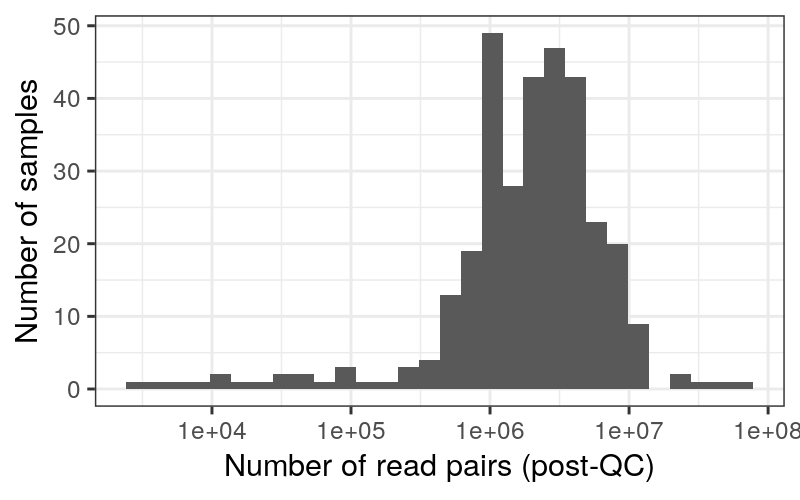

In [59]:
# reads
df_qc %>%
    filter(Read == 'R1') %>%
    .$Total.Sequences %>% 
    summary_x('total seqs.')

p = df_qc %>%
    filter(Read == 'R1') %>%
    ggplot(aes(Total.Sequences)) +
    geom_histogram(bins=30) +
    scale_x_log10() +
    labs(x='Number of read pairs (post-QC)', y='Number of samples') +
    theme_bw()

p.dims(4,2.5)
Plot(p)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Total seqs.,3029,1055064,2087042,3217127,3925772,42210405,16453578,6717145


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/3eb9e93184a6f2320a776112b07b2cec.RDS 


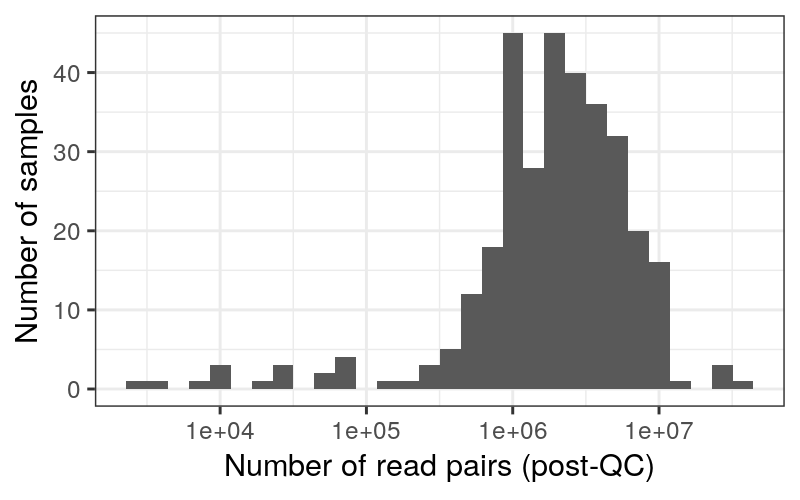

In [61]:
df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned') %>%
    .$Total.Sequences %>% 
    summary_x('Total seqs.')

p = df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned') %>%
    ggplot(aes(Total.Sequences)) +
    geom_histogram(bins=30) +
    scale_x_log10() +
    labs(x='Number of read pairs (post-QC)', y='Number of samples') +
    theme_bw()

p.dims(4,2.5)
Plot(p)

In [63]:
# top 10 samples
df.dims(10)
df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned') %>%
    arrange(-Total.Sequences) %>%
    dplyr::select(-Filename, -File.type, -Encoding, -Sequences.flagged.as.poor.quality) %>%
    head(n=10)
df.dims()

,Sample,Total.Sequences,Sequence.length,X.GC,total_deduplicated_percentage,avg_sequence_length,basic_statistics,per_base_sequence_quality,per_tile_sequence_quality,per_sequence_quality_scores,⋯,adapter_content,Read,scientific_name,class,order,family,genus,habitat,diet,sample_type
,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,XF14_Common_Bream,42210405,100-150,57,83.40814,148.6392,pass,pass,pass,pass,⋯,pass,R1,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,aquatic habitat,omnivore,feces
2,X276_Barnacle_Goose,29710937,100-150,51,69.03633,148.5467,pass,pass,pass,pass,⋯,pass,R1,Branta_leucopsis,Aves,Anseriformes,Anatidae,Branta,terrestrial habitat,herbivore,feces
3,X199_Human,25633395,100-150,44,68.49144,148.2012,pass,pass,pass,pass,⋯,pass,R1,Homo_sapiens,Mammalia,Primates,Hominidae,Homo,anthropogenic habitat,omnivore,feces
4,X84_Common_Chiffchaff,24926183,100-150,37,35.31461,148.2778,pass,pass,pass,pass,⋯,pass,R1,Phylloscopus_collybita,Aves,Passeriformes,Sylviidae,Phylloscopus,terrestrial habitat,omnivore,feces
5,X157_Grey_Heron,12217216,100-150,35,81.12302,148.2874,pass,pass,pass,pass,⋯,pass,R1,Ardea_cinerea,Aves,Ciconiiformes,Ardeidae,Ardea,terrestrial habitat,carnivore,gut
6,X292_Central_Bearded_Dragon,11726859,100-150,42,96.47064,147.8452,pass,pass,pass,pass,⋯,pass,R1,Pogona_vitticeps,Reptilia,Squamata,Agamidae,Pogona,terrestrial habitat,omnivore,feces
7,X392_House_Mouse,11414495,100-150,41,85.97794,148.1852,pass,pass,pass,pass,⋯,pass,R1,Mus_musculus,Mammalia,Rodentia,Muridae,Mus,terrestrial habitat,omnivore,gut
8,X430_Giraffe,11095316,100-150,44,96.85764,147.9625,pass,pass,pass,pass,⋯,pass,R1,Giraffa_camelopardalis,Mammalia,Artiodactyla,Giraffidae,Giraffa,terrestrial habitat,herbivore,feces
9,X138_Gaur,11033053,100-150,43,91.20737,148.7823,pass,pass,pass,pass,⋯,pass,R1,Bos_frontalis,Mammalia,Artiodactyla,Bovidae,Bos,terrestrial habitat,herbivore,feces


In [64]:
# bottom 10 samples
df.dims(10)
df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned') %>%
    arrange(Total.Sequences) %>%
    dplyr::select(-Filename, -File.type, -Encoding, 
                  -Sequences.flagged.as.poor.quality) %>%
    head(n=10)
df.dims()

,Sample,Total.Sequences,Sequence.length,X.GC,total_deduplicated_percentage,avg_sequence_length,basic_statistics,per_base_sequence_quality,per_tile_sequence_quality,per_sequence_quality_scores,⋯,adapter_content,Read,scientific_name,class,order,family,genus,habitat,diet,sample_type
,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,X114_fail_Hooded_Crow,3029,101-150,47,99.10862,147.5510,pass,pass,fail,pass,⋯,pass,R1,Corvus_cornix,Aves,Passeriformes,Corvidae,Corvus,terrestrial habitat,omnivore,gut
2,X93_Red_Sheep,4250,103-150,50,99.57647,147.4609,pass,pass,fail,pass,⋯,pass,R1,Ovis_aries,Mammalia,Artiodactyla,Bovidae,Ovis,terrestrial habitat,herbivore,feces
3,X294_Emu,6574,116-150,45,98.72224,149.4799,pass,pass,fail,pass,⋯,pass,R1,Dromaius_novaehollandiae,Aves,Struthioniformes,Dromaiidae,Dromaius,terrestrial habitat,omnivore,feces
4,X245_fail_Common_House_Martin,9193,100-150,51,99.66279,147.1465,pass,pass,fail,pass,⋯,pass,R1,Delichon_urbicum,Aves,Passeriformes,Hirundinidae,Delichon,terrestrial habitat,carnivore,feces
5,X399_Lion,10146,110-150,41,93.86951,148.0910,pass,pass,fail,pass,⋯,pass,R1,Panthera_leo,Mammalia,Carnivora,Felidae,Panthera,terrestrial habitat,carnivore,feces
6,X185_Brown_Trout,11320,103-150,38,97.01413,146.2834,pass,pass,fail,pass,⋯,pass,R1,Salmo_trutta,Actinopterygii,Salmoniformes,Salmonidae,Salmo,aquatic habitat,carnivore,gut
7,X295_Emu,17495,102-150,44,99.68562,147.6366,pass,pass,fail,pass,⋯,pass,R1,Dromaius_novaehollandiae,Aves,Struthioniformes,Dromaiidae,Dromaius,terrestrial habitat,omnivore,feces
8,X55_fail1_Water_Pipit,25046,114-150,43,97.74415,149.5810,pass,pass,warn,pass,⋯,pass,R1,Anthus_spinoletta,Aves,Passeriformes,Motacillidae,Anthus,terrestrial habitat,carnivore,feces
9,X274_Brant_Goose,29042,100-150,45,98.49184,146.9864,pass,pass,fail,pass,⋯,pass,R1,Branta_bernicla,Aves,Anseriformes,Anatidae,Branta,terrestrial habitat,omnivore,feces


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/33ee2ea7e060ced5812a15c8545bce6e.RDS 


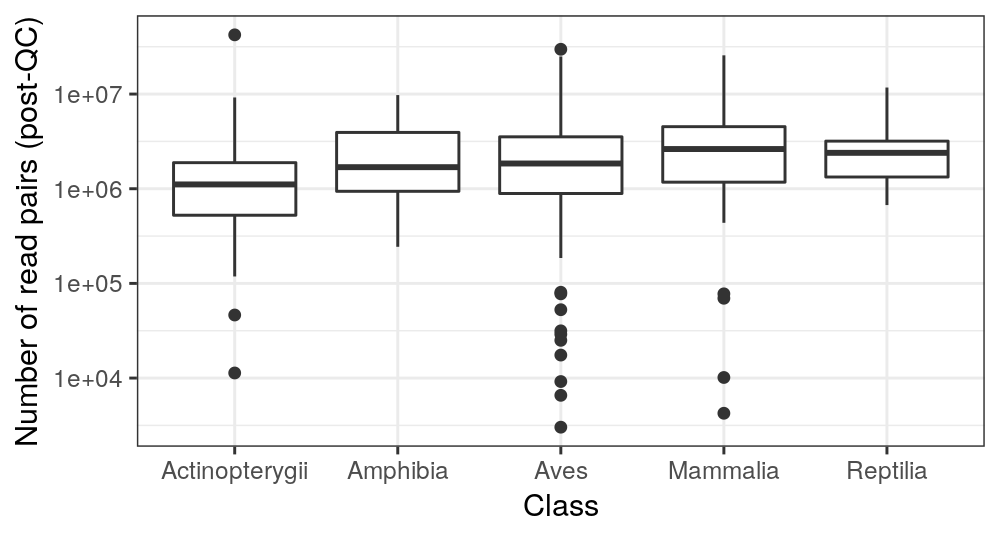

In [68]:
p = df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned') %>%
    ggplot(aes(class, Total.Sequences)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='Class', y='Number of read pairs (post-QC)') +
    theme_bw()

p.dims(5,2.7)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/f21d2d541fd0875229e43ff0273579fc.RDS 


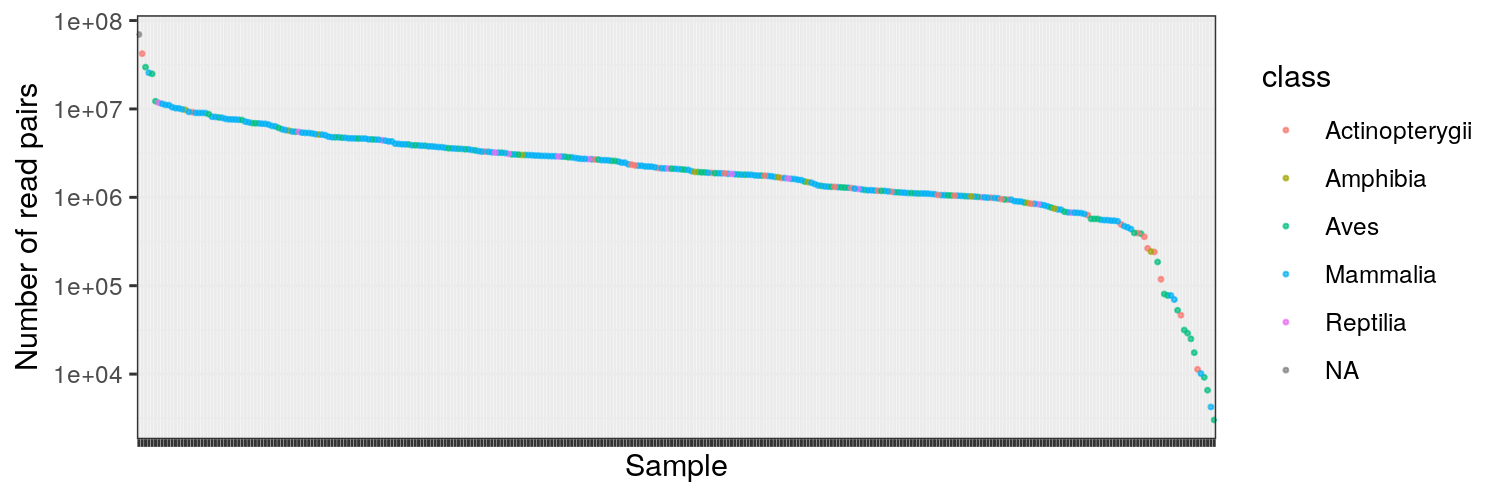

In [71]:
# total sequences
p = df_qc %>%
    filter(Read == 'R1') %>%
    mutate(Sample = Sample %>% reorder(-Total.Sequences)) %>%
    ggplot(aes(Sample, Total.Sequences, color=class)) +
    geom_point(alpha=0.7, size=0.5) +
    scale_y_log10() +
    labs(x='Sample', y='Number of read pairs') +
    theme_bw() +
    theme(
        axis.text.x = element_blank()
    )

p.dims(7.5,2.5)
Plot(p)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
ave. seq. length,144.0056,148.4159,148.9167,148.7894,149.3891,149.7554,2.113,0.863


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 9 rows containing missing values (geom_bar).”


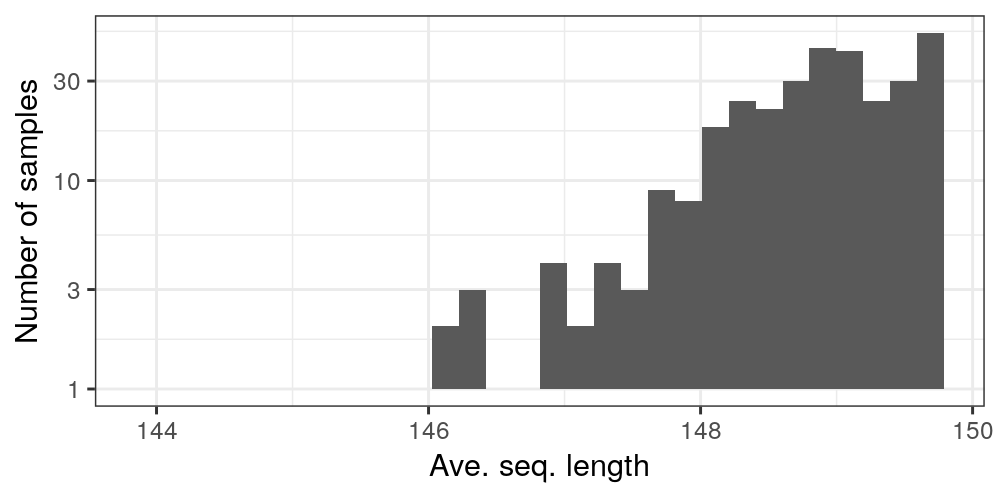

In [74]:
df_qc_s = df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned')

df_qc_s$avg_sequence_length %>% summary_x('ave. seq. length')

p = df_qc_s %>%
    ggplot(aes(avg_sequence_length)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    labs(x='Ave. seq. length', y='Number of samples') +
    theme_bw()

p.dims(5,2.5)
plot(p)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
GC,29,42,44,44.80805,47,67,12.261,5.005


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 7 rows containing missing values (geom_bar).”


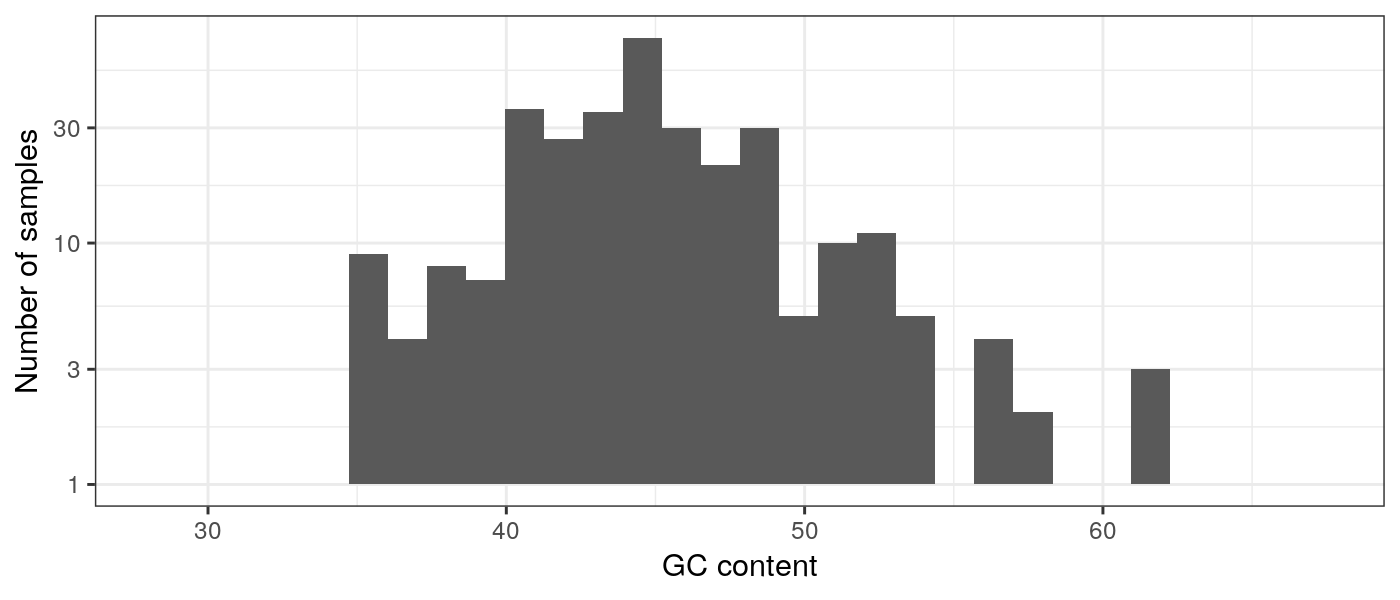

In [75]:
df_qc_s = df_qc %>%
    filter(Read == 'R1',
           Sample != 'unassigned')

df_qc_s$X.GC %>% summary_x('GC')

p = df_qc_s %>%
    ggplot(aes(X.GC)) +
    geom_histogram(bins=30) +
    scale_y_log10() +
    labs(x='GC content', y='Number of samples') +
    theme_bw()

p.dims(7, 3)
plot(p)

## Coverage

In [76]:
F = file.path(work_dir, 'coverage/nonpareil/all_summary.RDS')
df_cov = readRDS(F)$summary %>%
    as.data.frame %>%
    mutate(Sample = rownames(.)) 
df_cov

Warning message:
“namespace ‘Nonpareil’ is not available and has been replaced
by .GlobalEnv when processing object ‘conda_env’”


kappa,C,LR,modelR,LRstar,diversity,Sample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.30862,0.3414071,1152406305,0.9996628,9.870656e+10,21.56971,X101_Horse
0.39165,0.4244829,422061930,0.9861334,1.447983e+16,19.91179,X107_House_Mouse
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.48328,0.5144225,577836526,0.9930337,94748453741,20.01099,X91_Dunnock
0.44937,0.4813252,185448536,0.9878017,216145216707,19.16230,X92_Lesser_White_toothed_Shrew


In [77]:
# joining with metadata
overlap(df_cov$Sample, metadata$SampleID)
setdiff(df_cov$Sample, metadata$SampleID) %>% print
setdiff(metadata$SampleID, df_cov$Sample) %>% unique %>% length %>% print

intersect(x,y): 307 
setdiff(x,y): 1 
setdiff(y,x): 168 
union(x,y): 476 
[1] "unassigned"
[1] 168


In [78]:
# joining
df_cov = df_cov %>%
    left_join(metadata, c('Sample'='SampleID')) %>%
     mutate(C = ifelse(is.na(C), 0, C))

df_cov 

kappa,C,LR,modelR,LRstar,diversity,Sample,scientific_name,class,order,family,genus,habitat,diet,sample_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0.30862,0.3414071,1152406305,0.9996628,9.870656e+10,21.56971,X101_Horse,Equus_caballus,Mammalia,Perissodactyla,Equidae,Equus,terrestrial habitat,herbivore,feces
0.39165,0.4244829,422061930,0.9861334,1.447983e+16,19.91179,X107_House_Mouse,Mus_musculus,Mammalia,Rodentia,Muridae,Mus,anthropogenic habitat,omnivore,gut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.48328,0.5144225,577836526,0.9930337,94748453741,20.01099,X91_Dunnock,Prunella_modularis,Aves,Passeriformes,Passeridae,Prunella,terrestrial habitat,omnivore,feces
0.44937,0.4813252,185448536,0.9878017,216145216707,19.16230,X92_Lesser_White_toothed_Shrew,Crocidura_suaveolens,Mammalia,Soricomorpha,Soricidae,Crocidura,terrestrial habitat,carnivore,feces


In [79]:
# duplicate samples?
df_cov %>%
    group_by(Sample) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    filter(n > 1)

Sample,n
<chr>,<int>


In [80]:
# adding qc
df_cov = df_cov %>%
    left_join(df_qc %>% 
                  filter(Read == 'R1') %>%
                  dplyr::select(Sample, Total.Sequences, Sequence.length, 
                                X.GC, avg_sequence_length),
              c('Sample')) 

df_cov 

kappa,C,LR,modelR,LRstar,diversity,Sample,scientific_name,class,order,family,genus,habitat,diet,sample_type,Total.Sequences,Sequence.length,X.GC,avg_sequence_length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
0.30862,0.3414071,1152406305,0.9996628,9.870656e+10,21.56971,X101_Horse,Equus_caballus,Mammalia,Perissodactyla,Equidae,Equus,terrestrial habitat,herbivore,feces,7716507,100-150,45,149.2332
0.39165,0.4244829,422061930,0.9861334,1.447983e+16,19.91179,X107_House_Mouse,Mus_musculus,Mammalia,Rodentia,Muridae,Mus,anthropogenic habitat,omnivore,gut,2833353,100-150,41,148.8060
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.48328,0.5144225,577836526,0.9930337,94748453741,20.01099,X91_Dunnock,Prunella_modularis,Aves,Passeriformes,Passeridae,Prunella,terrestrial habitat,omnivore,feces,3881823,100-150,61,148.6763
0.44937,0.4813252,185448536,0.9878017,216145216707,19.16230,X92_Lesser_White_toothed_Shrew,Crocidura_suaveolens,Mammalia,Soricomorpha,Soricidae,Crocidura,terrestrial habitat,carnivore,feces,1253488,100-150,52,147.7425


In [81]:
# which have metadata NA values?
df_cov %>%
    filter(is.na(class)) %>%
    distinct(Sample, .keep_all=TRUE)

kappa,C,LR,modelR,LRstar,diversity,Sample,scientific_name,class,order,family,genus,habitat,diet,sample_type,Total.Sequences,Sequence.length,X.GC,avg_sequence_length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
0.42562,0.4580172,10355647461,0.9993355,4.047812e+12,23.07389,unassigned,NA,NA,NA,NA,NA,NA,NA,NA,69503322,100-150,44,148.8431


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Cov.,0.1506529,0.4477855,0.5145052,0.526256,0.5915281,0.9791558,0.267,0.109


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/e3b585203855f52a35787253f9685785.RDS 


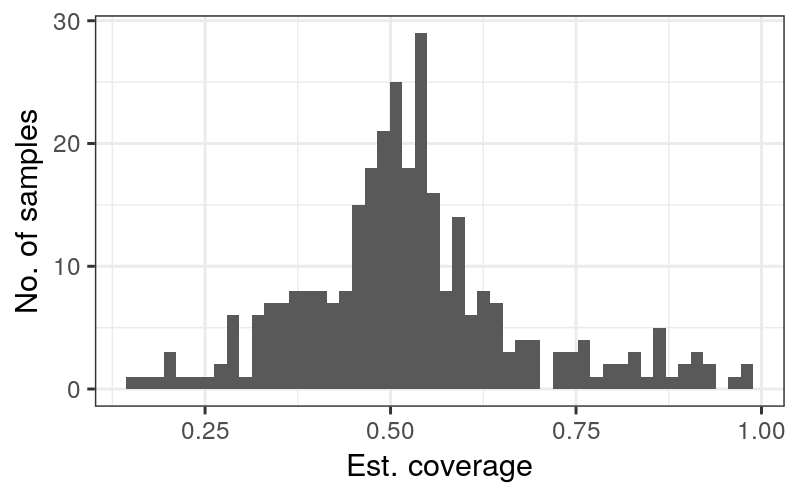

In [83]:
# coverage distribution
df_cov %>% .$C %>% summary_x('Cov.')

p = df_cov %>%
    ggplot(aes(C)) +
    geom_histogram(bins=50) +
    labs(x='Est. coverage', y='No. of samples') +
    theme_bw() 

p.dims(4, 2.5)
Plot(p)

In [84]:
# top 10 coverage
df.dims(10)
df_cov %>%
    dplyr::select(Sample, C, diversity, Total.Sequences, class, diet) %>%
    arrange(-C) %>%
    head(n=10) 
df.dims()

,Sample,C,diversity,Total.Sequences,class,diet
,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,X84_Common_Chiffchaff,0.9791558,14.22184,24926183,Aves,omnivore
2,X256_Zander,0.9757480,14.88468,9198058,Actinopterygii,carnivore
3,X199_Human,0.9587654,18.32641,25633395,Mammalia,omnivore
4,X276_Barnacle_Goose,0.9366420,16.89617,29710937,Aves,herbivore
5,X355_Hoffmanns_Two_toed_Sloth,0.9248990,17.52873,9913822,Mammalia,herbivore
6,X243_Noctule,0.9214176,15.17278,1563391,Mammalia,carnivore
7,X299_fail_Chestnut_rumped_Thornbill,0.9162761,10.78040,569648,Aves,carnivore
8,X18_West_European_Hedgehog,0.9111779,15.82765,2921509,Mammalia,carnivore
9,X157_Grey_Heron,0.9029397,17.88733,12217216,Aves,carnivore


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/7cc567b67a7640208c7b9f9ca0cbd2b9.RDS 


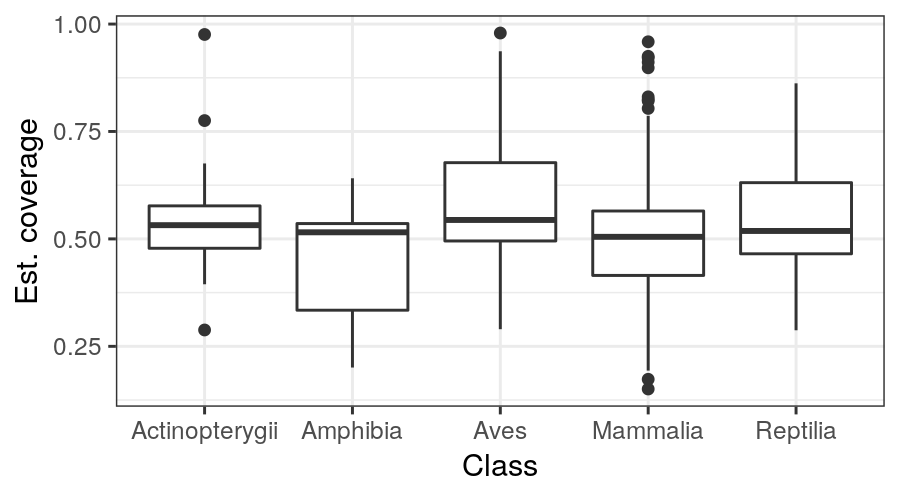

In [87]:
p = df_cov %>%
    filter(Sample != 'unassigned') %>%
    ggplot(aes(class, C)) +
    geom_boxplot() +
    labs(y='Est. coverage', x='Class') +
    theme_bw() 

p.dims(4.5, 2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/8e5154d55d11b36751920f21685ef624.RDS 


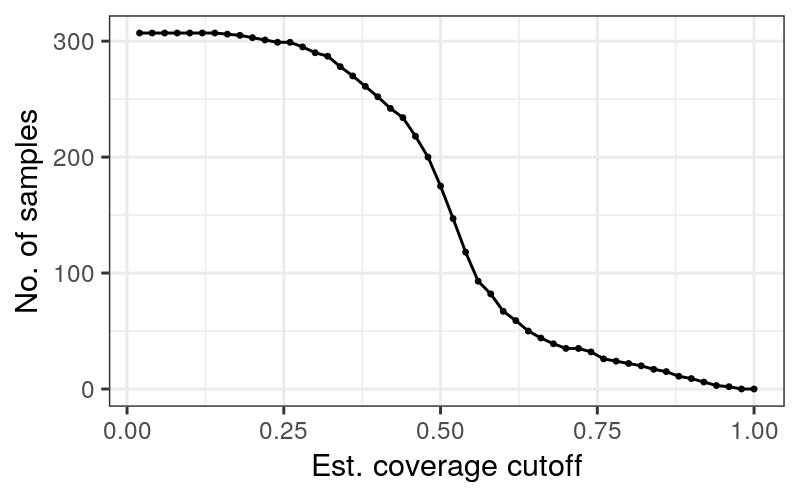

In [89]:
# number of samples above a specific cutoff
n_samples_remain = function(cutoff, df){
    df %>%
        filter(!is.na(class), 
               !is.na(diet)) %>%
        filter(C >= cutoff) %>%
        .$Sample %>% unique %>% length
}

cov_cutoff = (1:50)/50
n_samples = sapply(cov_cutoff, function(x) n_samples_remain(x, df=df_cov))
df = data.frame(cov_cutoff = cov_cutoff,
                n_samples = n_samples)
                   
total_samps = filter(df_cov, !is.na(class), !is.na(diet)) %>%
                .$Sample %>% unique %>% length
df$perc_samples = df$n_samples / total_samps * 100
                   
p = ggplot(df, aes(cov_cutoff, n_samples)) +
    geom_line() +
    geom_point(size=0.5) +
    labs(x='Est. coverage cutoff', y='No. of samples') +
    theme_bw()

p.dims(4, 2.5)                
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/2e1d4c2309690ac268ecdba26500cfc6.RDS 


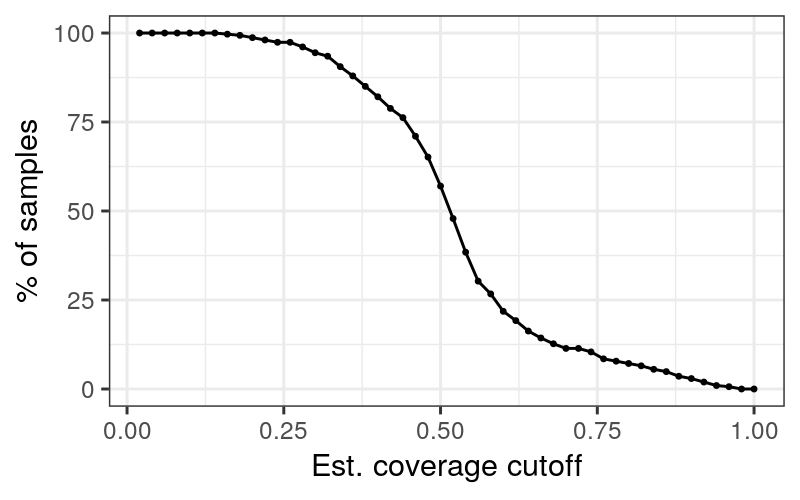

In [90]:
p = ggplot(df, aes(cov_cutoff, perc_samples)) +
    geom_line() +
    geom_point(size=0.5) +
    scale_y_continuous(limits=c(0, 100)) +
    labs(x='Est. coverage cutoff', y='% of samples') +
    theme_bw()

p.dims(4, 2.5)
Plot(p)

In [92]:
# which cutoff to select?
df.dims(30)
df %>%
    filter(cov_cutoff >= 0.3,
           cov_cutoff <= 0.4)
df.dims()

cov_cutoff,n_samples,perc_samples
<dbl>,<int>,<dbl>
0.30,290,94.46254
0.32,287,93.48534
0.34,278,90.55375
0.36,270,87.94788
0.38,261,85.01629
0.40,252,82.08469


In [95]:
# number of samples above a specific cutoff
classes_remain = function(cutoff, df){
    df = df %>%
        filter(!is.na(class), C >= cutoff) %>%
        distinct(Sample, class) %>%
        group_by(class) %>%
        summarize(n = n()) %>%
        ungroup() %>%
        as.data.frame
    
    if(nrow(df) < 1){
        return(data.frame(class = c(NA), n = c(0), cov_cutoff = c(cutoff)))
    }
    
    df$cov_cutoff = cutoff
    return(df)
}

cov_cutoff = (1:100)/100
df_cov_s = lapply(as.list(cov_cutoff), function(x) classes_remain(x, df=df_cov)) %>%
      do.call(rbind, .) %>%
      filter(!is.na(class))
                  
df_cov_s

Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `class` contains implicit NA, consider using `forcats::fct_explicit_na`”


class,n,cov_cutoff
<fct>,<int>,<dbl>
Actinopterygii,28,0.01
Amphibia,11,0.01
⋮,⋮,⋮
Actinopterygii,1,0.97
Aves,1,0.97


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/7bc17191b730b2580cff03794964c8ec.RDS 


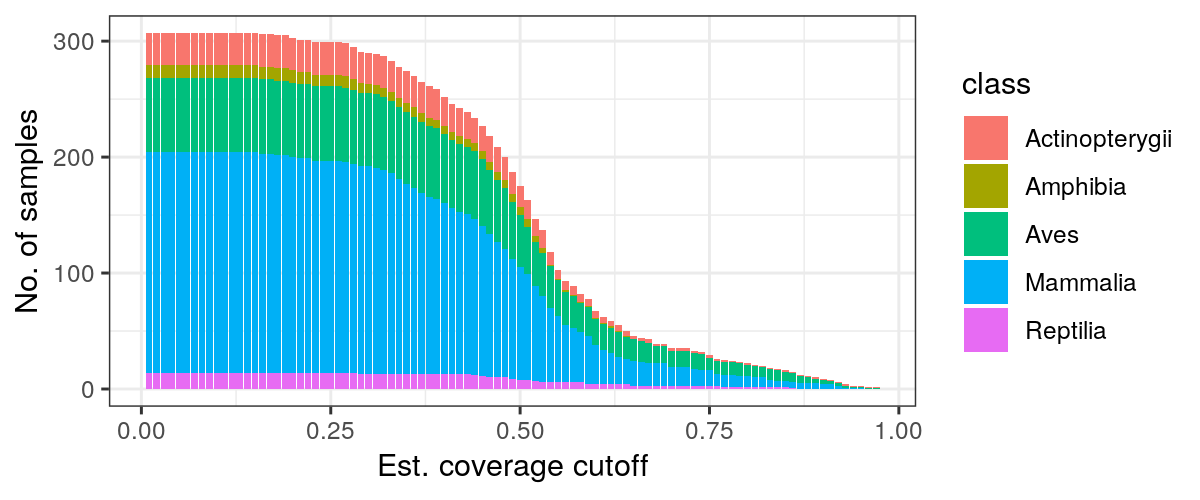

In [97]:
# plotting           
p = ggplot(df_cov_s, aes(cov_cutoff, n, fill=class)) +
    geom_bar(stat='identity') +
    labs(x='Est. coverage cutoff', y='No. of samples') +
    theme_bw()

p.dims(6, 2.5)
Plot(p)

In [98]:
# number of samples above a specific cutoff
diet_remain = function(cutoff, df){
    df = df %>%
        filter(!is.na(class)) %>%
        mutate(diet = gsub(' ', '', diet)) %>%
        filter(C >= cutoff) %>%
        distinct(Sample, diet) %>%
        group_by(diet) %>%
        summarize(n = n()) %>%
        ungroup() %>%
        as.data.frame
    
    if(nrow(df) < 1){
        return(data.frame(diet = c(NA), n = c(0), cov_cutoff = c(cutoff)))
    }
    
    df$cov_cutoff = cutoff
    return(df)
}

cov_cutoff = (1:100)/100
df_cov_s = lapply(as.list(cov_cutoff), function(x) diet_remain(x, df=df_cov)) %>%
      do.call(rbind, .) %>%
      filter(!is.na(diet))
     
df_cov_s

diet,n,cov_cutoff
<chr>,<dbl>,<dbl>
carnivore,106,0.01
herbivore,97,0.01
⋮,⋮,⋮
carnivore,1,0.97
omnivore,1,0.97


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/c5a9e4d07d38c9c4bf7be5cfc0cc1f66.RDS 


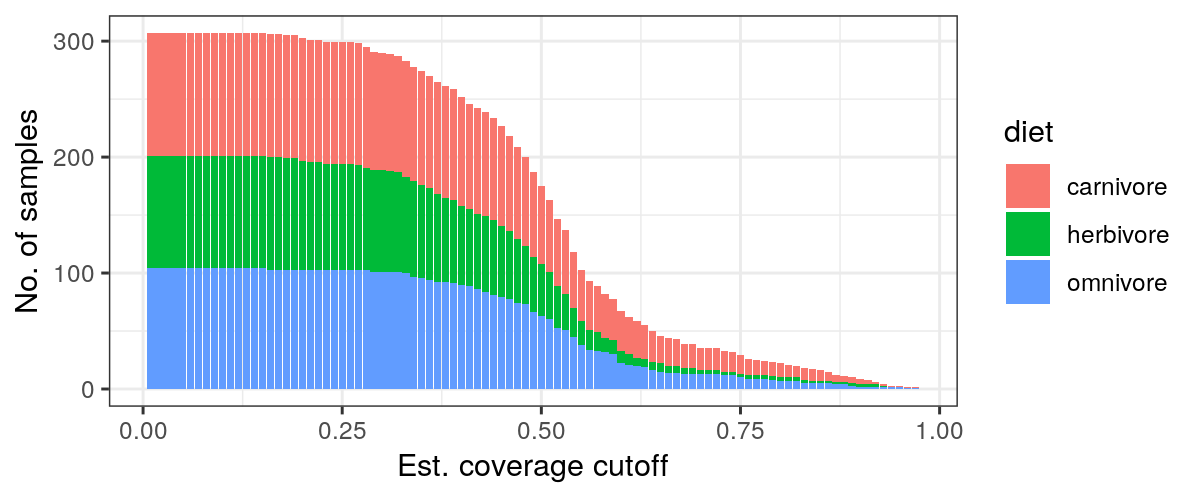

In [99]:
# plotting
p = ggplot(df_cov_s, aes(cov_cutoff, n, fill=diet)) +
    geom_bar(stat='identity') +
    labs(x='Est. coverage cutoff', y='No. of samples') +
    theme_bw()

p.dims(6, 2.5)
Plot(p)

### cov ~ reads

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/7b29481f37166b473e516ad1c63ebcd7.RDS 


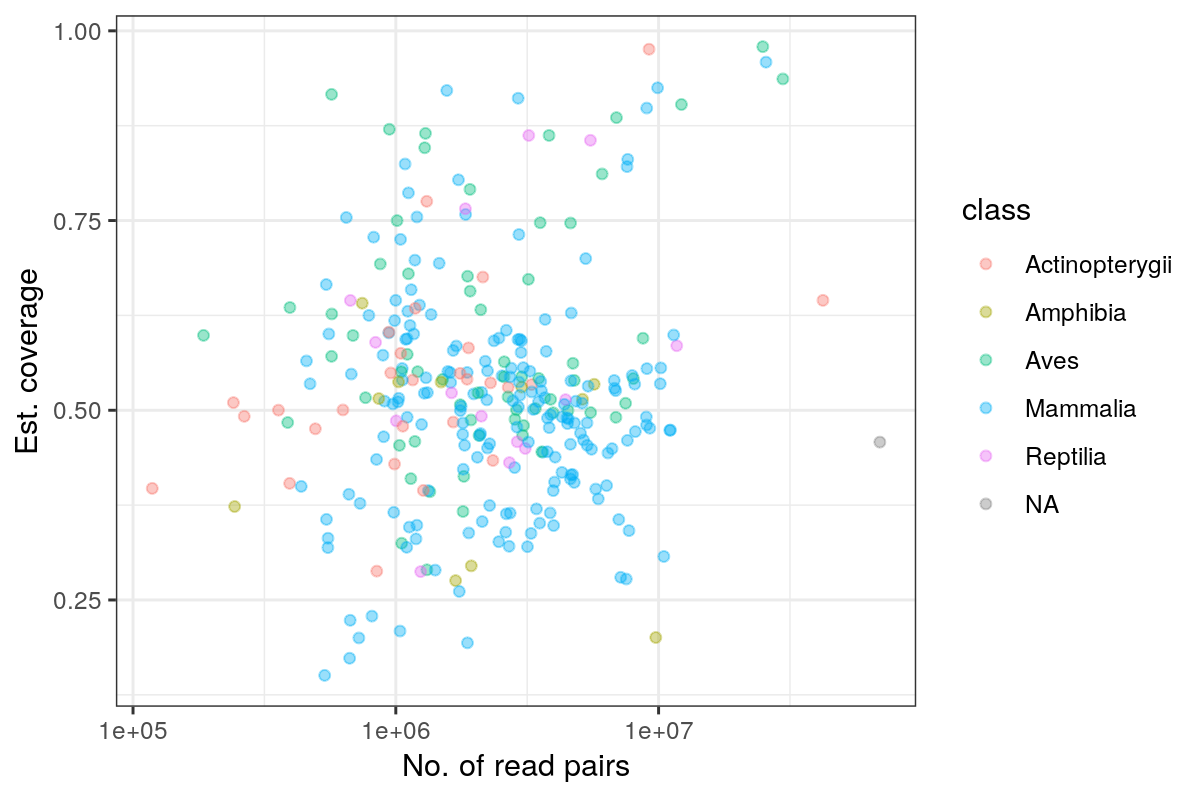

In [101]:
# plotting
p = df_cov %>%
    ggplot(aes(Total.Sequences, C, color=class)) +
    geom_point(alpha=0.4) +
    scale_x_log10() +
    labs(x='No. of read pairs', y='Est. coverage') +
    theme_bw()

p.dims(6,4)
Plot(p)

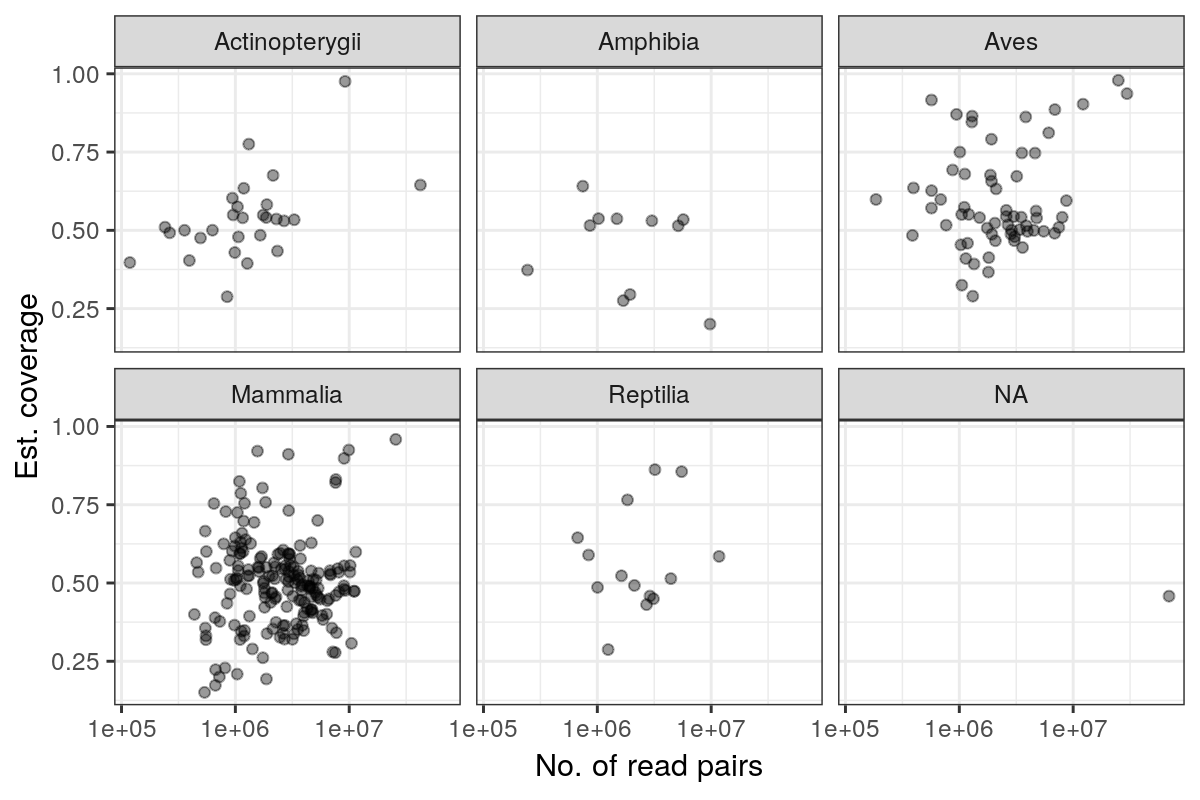

In [102]:
p = df_cov %>%
    ggplot(aes(Total.Sequences, C)) +
    geom_point(alpha=0.4) +
    scale_x_log10() +
    labs(x='No. of read pairs', y='Est. coverage') +
    facet_wrap(~ class) +
    theme_bw()

p.dims(6,4)
plot(p)

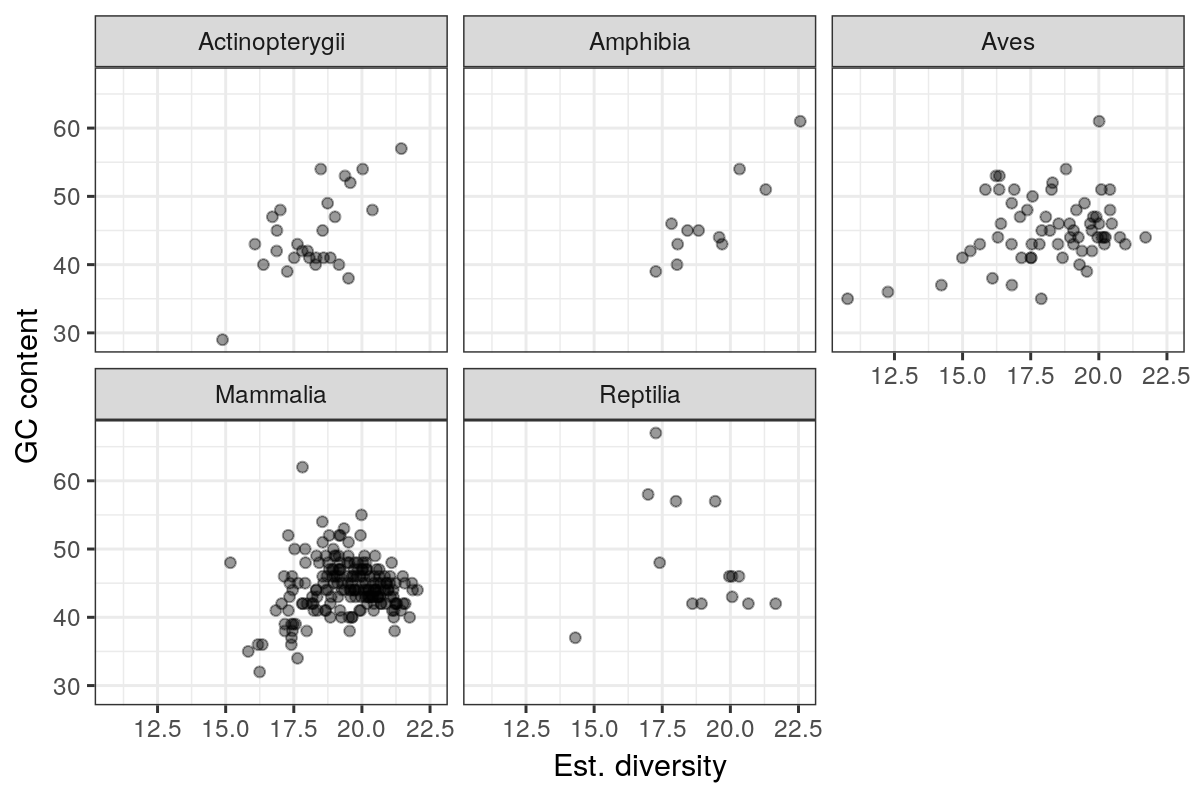

In [104]:
p = df_cov %>%
    filter(!is.na(class)) %>%
    ggplot(aes(diversity, X.GC)) +
    geom_point(alpha=0.4) +
    labs(x='Est. diversity', y='GC content') +
    facet_wrap(~ class) +
    theme_bw()

p.dims(6,4)
plot(p)

# Writing tables

In [105]:
df_cov_f = df_cov %>%
    dplyr::select(Sample, Total.Sequences, C, diversity) %>%
    rename('nonpareil_coverage' = C,
           'nonpareil_diversity' = diversity) 

df_cov_f

Sample,Total.Sequences,nonpareil_coverage,nonpareil_diversity
<chr>,<dbl>,<dbl>,<dbl>
X101_Horse,7716507,0.3414071,21.56971
X107_House_Mouse,2833353,0.4244829,19.91179
⋮,⋮,⋮,⋮
X91_Dunnock,3881823,0.5144225,20.01099
X92_Lesser_White_toothed_Shrew,1253488,0.4813252,19.16230


In [100]:
# QC summary
outF = file.path(work_dir, 'sample_qc_summary.tsv')
write.table(df_cov_f, outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//sample_qc_summary.tsv 


## just 'good' samples

In [106]:
final_samps = read.delim(file.path(work_dir, 'final', 'samples.txt'))
final_samps 

Sample,Read1,Read2,Notes
<fct>,<fct>,<fct>,<lgl>
X101_Horse,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X101_Horse/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X101_Horse/R2_final.fq.gz,NA
X107_House_Mouse,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X107_House_Mouse/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X107_House_Mouse/R2_final.fq.gz,NA
⋮,⋮,⋮,⋮
X92_Lesser_White_toothed_Shrew,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X92_Lesser_White_toothed_Shrew/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X92_Lesser_White_toothed_Shrew/R2_final.fq.gz,NA
X93_Red_Sheep,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X93_Red_Sheep/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X93_Red_Sheep/R2_final.fq.gz,NA


In [107]:
overlap(df_cov_f$Sample, final_samps$Sample)
setdiff(df_cov_f$Sample, final_samps$Sample)
cat('----\n')
setdiff(final_samps$Sample, df_cov_f$Sample)

intersect(x,y): 308 
setdiff(x,y): 0 
setdiff(y,x): 16 
union(x,y): 324 


character(0)

----


[1] "X113_Eurasian_Woodcock"        "X294_Emu"                     
 [3] "X55_fail1_Water_Pipit"         "X104_European_Robin"          
 [5] "X105_Eurasian_Teal"            "X114_fail_Hooded_Crow"        
 [7] "X179_Roach"                    "X185_Brown_Trout"             
 [9] "X245_fail_Common_House_Martin" "X274_Brant_Goose"             
[11] "X295_Emu"                      "X358_Brown_throated_Sloth"    
[13] "X37_Bank_Vole"                 "X38_Great_Tit"                
[15] "X399_Lion"                     "X93_Red_Sheep"

In [108]:
# joining
final_samps_f = final_samps %>%
    dplyr::select(-Notes) %>%
    inner_join(df_cov_f %>% filter(nonpareil_coverage >= 0.3),
               c('Sample')) %>%
    arrange(nonpareil_coverage) 

final_samps_f

Warning message:
“Column `Sample` joining factor and character vector, coercing into character vector”


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R2_final.fq.gz,9198058,0.9757480,14.88468
X84_Common_Chiffchaff,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R2_final.fq.gz,24926183,0.9791558,14.22184


In [104]:
# 'good' sample table
outF = file.path(work_dir, 'samples_cov-gte0.3.tsv')
final_samps_f %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n') 

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC//samples_cov-gte0.3.tsv 


### Summary

In [110]:
final_samps_f %>% nrow %>% cat('No. pre-filter:', ., '\n')
final_samps_f$Sample %>% unique_n('Samples')
final_samps_f %>%
    filter(Sample != 'unassigned') %>% nrow %>% cat('No. post-filter:', ., '\n')

No. pre-filter: 291 
No. of unique Samples: 291 
No. post-filter: 290 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Total seqs.,118337,1141820,2318056,3440019,4225410,42210405,16382153,6687986


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/670f6596106097b9b0d54afa8ed57d75.RDS 


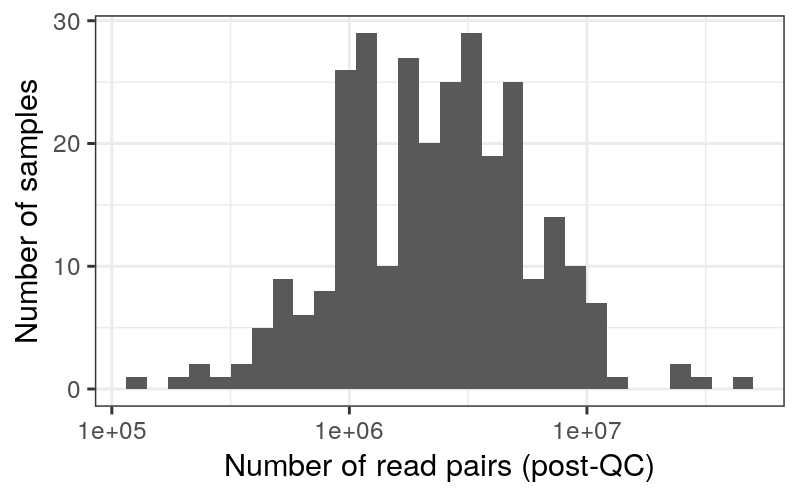

In [112]:
final_samps_f %>%
    filter(Sample != 'unassigned') %>%
    .$Total.Sequences %>% 
    summary_x('Total seqs.')

p = final_samps_f %>%
    filter(Sample != 'unassigned') %>%
    ggplot(aes(Total.Sequences)) +
    geom_histogram(bins=30) +
    scale_x_log10() +
    labs(x='Number of read pairs (post-QC)', y='Number of samples') +
    theme_bw()

p.dims(4,2.5)
Plot(p)

In [113]:
df.dims(30)
final_samps_f %>%
    dplyr::select(-Read1, -Read2) %>%
    arrange(-Total.Sequences) %>%
    head
df.dims()

,Sample,Total.Sequences,nonpareil_coverage,nonpareil_diversity
,<chr>,<dbl>,<dbl>,<dbl>
1,unassigned,69503322,0.4580172,23.07389
2,XF14_Common_Bream,42210405,0.6448592,21.44619
3,X276_Barnacle_Goose,29710937,0.9366420,16.89617
4,X199_Human,25633395,0.9587654,18.32641
5,X84_Common_Chiffchaff,24926183,0.9791558,14.22184
6,X157_Grey_Heron,12217216,0.9029397,17.88733


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
Nonpareil cov.,0.3073356,0.4604291,0.5227259,0.543124,0.5941229,0.9791558,0.224,0.092


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/9a4e060e75bf4dcbc9d46e619c0931dc.RDS 


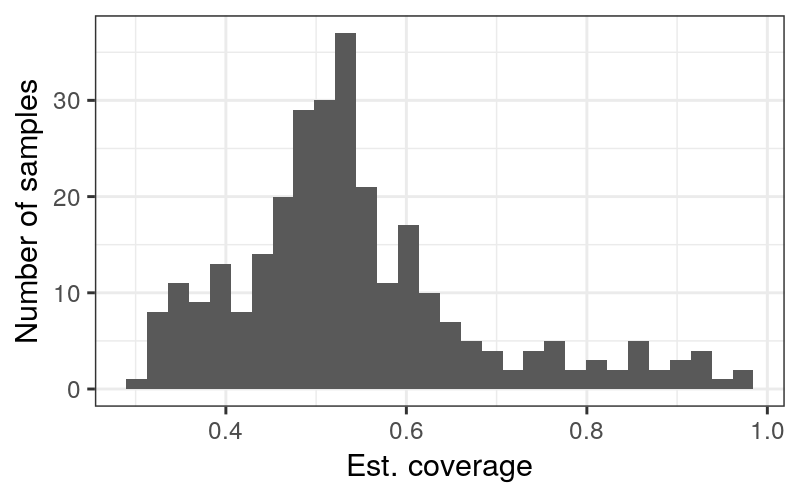

In [116]:
final_samps_f %>%
    filter(Sample != 'unassigned') %>%
    .$nonpareil_coverage %>% 
    summary_x('Nonpareil cov.')

p = final_samps_f %>%
    filter(Sample != 'unassigned') %>%
    ggplot(aes(nonpareil_coverage)) +
    geom_histogram(bins=30) +
    labs(x='Est. coverage', y='Number of samples') +
    theme_bw()

p.dims(4,2.5)
Plot(p)

In [117]:
df.dims(30)
final_samps_f %>%
    dplyr::select(-Read1, -Read2) %>%
    arrange(-nonpareil_coverage) %>%
    head
df.dims()

,Sample,Total.Sequences,nonpareil_coverage,nonpareil_diversity
,<chr>,<dbl>,<dbl>,<dbl>
1,X84_Common_Chiffchaff,24926183,0.9791558,14.22184
2,X256_Zander,9198058,0.9757480,14.88468
3,X199_Human,25633395,0.9587654,18.32641
4,X276_Barnacle_Goose,29710937,0.9366420,16.89617
5,X355_Hoffmanns_Two_toed_Sloth,9913822,0.9248990,17.52873
6,X243_Noctule,1563391,0.9214176,15.17278


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/d7378e63629880b862c68808805ccdd7.RDS 


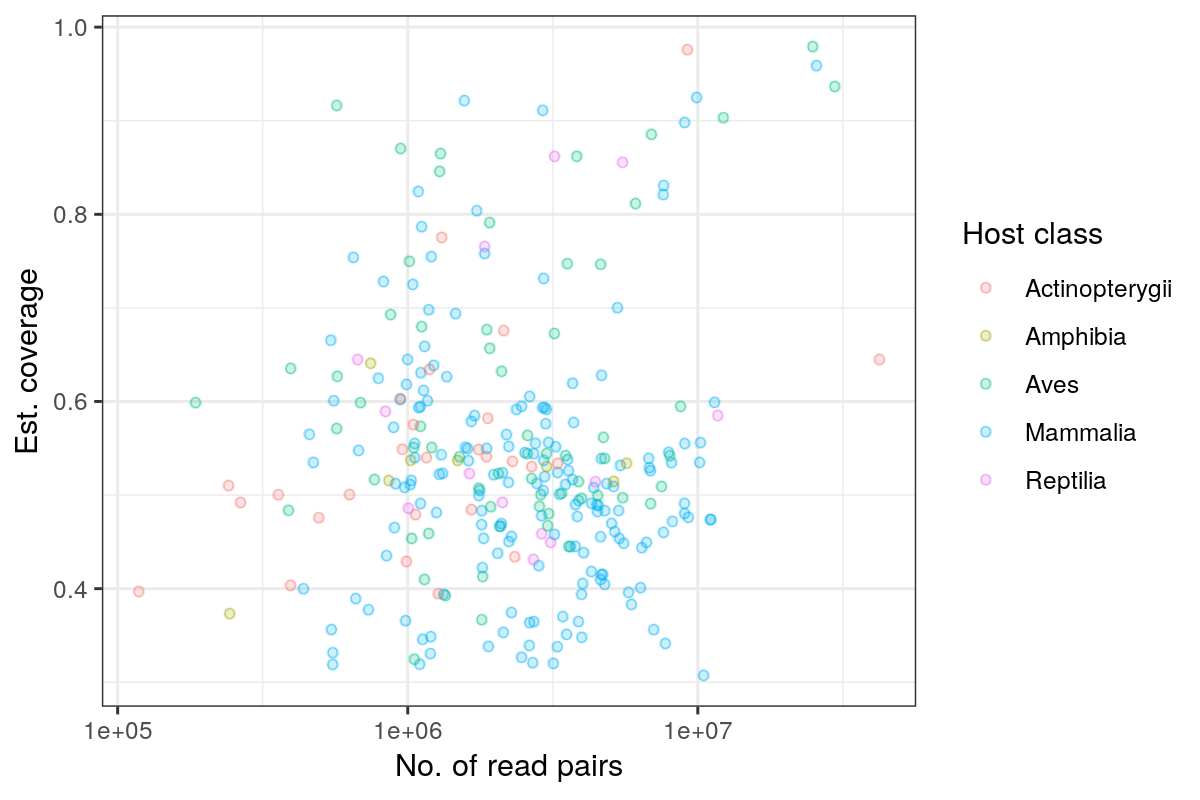

In [119]:
p = final_samps_f %>%
    inner_join(metadata, c('Sample'='SampleID')) %>%
    ggplot(aes(Total.Sequences, nonpareil_coverage, color=class)) +
    geom_point(alpha=0.4, shape='O') +
    geom_point(alpha=0.2) +
    scale_x_log10() +
    scale_color_discrete('Host class') +
    labs(x='No. of read pairs', y='Est. coverage') +
    theme_bw()

p.dims(6,4)
Plot(p)

# sessionInfo

In [120]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.7.so

Random number generation:
 RNG:     Mersenne-Twister 
 Normal:  Inversion 
 Sample:  Rounding 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.2 ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       magrittr_1.5     munsell_0.5.0    tidyselect